**Nama : Clarissa Beatrice Kosasih  
NIM : 2702209350**  

---
Link Video : [Video-LSTM](https://binusianorg-my.sharepoint.com/personal/clarissa_kosasih001_binus_ac_id/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fclarissa%5Fkosasih001%5Fbinus%5Fac%5Fid%2FDocuments%2FSemester%204%2FDeep%20Learning%2FFINALS%2FCase%201%2DLSTM&ga=1)

---
Dataset A : memprediksi kondisi kualitas udara suatu wilayah (AT)

Berikut adalah daftar parameter, deskripsi, dan unitnya:

| Parameter           | Deskripsi                                   | Unit                                  |
| :------------------ | :------------------------------------------ | :------------------------------------ |
| From Date           | Starting date of data collection            | -                                     |
| To Date             | Ending date of data collection              | -                                     |
| PM10                | Particulate Matter 10                       | ug/m3                                 |
| PM2.5               | Particulate Matter 2.5                      | ug/m3                                 |
| CO                  | Carbon Monoxide                             | mg/Nm3, mg/m3, ng/m3, ug/m3           |
| CO2                 | Carbon Dioxide                              | mg/m3                                 |
| NO                  | Nitric Oxide                                | mg/m3, ppb, ppm, ug/m3                |
| NO2                 | Nitrogen Dioxide                            | ug/m3                                 |
| NOx                 | Nitrogen Oxides                             | ppb, ppm, ug/m3                       |
| NH3                 | Ammonia                                     | ppb, ug/m3                            |
| SO2                 | Sulfur Dioxide                              | ug/m3                                 |
| Temp                | Temperature                                 | degrees Celsius or ug/m3              |
| AT                  | Air Temperature                             | degrees Celsius or ug/m3              |
| BP                  | Barometric Pressure                         | W/mt2, mg/m3, mmHg                    |
| Benzene             | Concentration of Benzene in the air         | mg/m3 or ug/m3                        |
| Toluene             | Concentration of Toluene in the air         | ug/m3                                 |
| VWS                 | Wind Speed                                  | degree, m/s                           |
| Variance            | Variance                                    | n                                     |
| WD                  | Wind Direction                              | deg, degree C, degree                 |
| WS                  | Wind Speed                                  | m/s, ug/m3                            |
| Xylene              | Concentration of Xylene in the air          | ug/m3                                 |


# Read Data and Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('AP003.csv')
data.head()

From Date              To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0  2017-07-01 00:00:00  2017-07-01 01:00:00          50.00         91.75   
1  2017-07-01 01:00:00  2017-07-01 02:00:00          30.75         59.25   
2  2017-07-01 02:00:00  2017-07-01 03:00:00            NaN           NaN   
3  2017-07-01 03:00:00  2017-07-01 04:00:00           8.00           NaN   
4  2017-07-01 04:00:00  2017-07-01 05:00:00          33.25           NaN   

   NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  \
0        3.33        27.70      17.48          NaN        24.35        1.33   
1        1.20        20.78      11.40         0.03         8.23        1.77   
2        1.17         4.07       2.73         0.10        10.77        1.20   
3        2.58         6.38       5.30          NaN        19.78        1.58   
4        5.30        21.03      15.47         0.15        22.40        2.25   

   ...  Temp (degree C)  RH (%)  WS (m/s)  WD (degree)  SR (W/mt2)  BP (mmHg)  \
0  ...            55.22   83.25      1.67       285.50        6.75      737.0   
1  ...            57.48   84.50      2.50       299.50        6.75      736.0   
2  ...            58.67   86.00      0.77       285.67        6.67      736.0   
3  ...            58.93   86.00      1.55       302.50        6.00      735.0   
4  ...            59.88   86.00      2.30       297.25        6.00      735.0   

   VWS (m/s)  AT (degree C)  RF (mm)  Xylene (ug/m3)  
0       0.03          26.30     0.00            0.65  
1       0.05          25.00     1.50            0.50  
2       0.03          24.17     0.33            0.43  
3       0.08          24.10     0.00            0.63  
4       0.08          24.90     0.00            0.67  

[5 rows x 23 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        50400 non-null  object 
 1   To Date          50400 non-null  object 
 2   PM2.5 (ug/m3)    44691 non-null  float64
 3   PM10 (ug/m3)     45018 non-null  float64
 4   NO (ug/m3)       46252 non-null  float64
 5   NO2 (ug/m3)      45705 non-null  float64
 6   NOx (ppb)        47040 non-null  float64
 7   NH3 (ug/m3)      45756 non-null  float64
 8   SO2 (ug/m3)      43604 non-null  float64
 9   CO (mg/m3)       46993 non-null  float64
 10  Ozone (ug/m3)    45309 non-null  float64
 11  Benzene (ug/m3)  46678 non-null  float64
 12  Toluene (ug/m3)  46678 non-null  float64
 13  Temp (degree C)  46335 non-null  float64
 14  RH (%)           46520 non-null  float64
 15  WS (m/s)         46522 non-null  float64
 16  WD (degree)      44710 non-null  float64
 17  SR (W/mt2)  

Dataset ini memiliki 23 kolom; 21 kolom diantaranya berdatatype float dan sisanya object. Dari non-null dan count, dapat dilihat banyak terdapat missing values.

# EDA

## Handling Missing Values

In [ ]:
# Persentase Missing Values

na_ammount = data.isna().sum()
na_percentage = (na_ammount / len(data)) * 100

pd.DataFrame({
    'Missing Values': na_ammount,
    'Percentage (%)': round(na_percentage, 2)
})

Missing Values  Percentage (%)
From Date                     0            0.00
To Date                       0            0.00
PM2.5 (ug/m3)              5709           11.33
PM10 (ug/m3)               5382           10.68
NO (ug/m3)                 4148            8.23
NO2 (ug/m3)                4695            9.32
NOx (ppb)                  3360            6.67
NH3 (ug/m3)                4644            9.21
SO2 (ug/m3)                6796           13.48
CO (mg/m3)                 3407            6.76
Ozone (ug/m3)              5091           10.10
Benzene (ug/m3)            3722            7.38
Toluene (ug/m3)            3722            7.38
Temp (degree C)            4065            8.07
RH (%)                     3880            7.70
WS (m/s)                   3878            7.69
WD (degree)                5690           11.29
SR (W/mt2)                 3355            6.66
BP (mmHg)                  6720           13.33
VWS (m/s)                  3357            6.66
AT (degree C)              4030            8.00
RF (mm)                    3252            6.45
Xylene (ug/m3)             3742            7.42

Setiap kolom kecuali `From Date` dan `To Date` memiliki missing value, dengan yang tertinggi pada kolom `SO2` sebesar 13,48%. Karena banyaknya data yang hilang, selanjutnya akan dicek konsistensi atau keberurutan tanggal.

In [ ]:
data[data.isna().any(axis=1)]

From Date              To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0      2017-07-01 00:00:00  2017-07-01 01:00:00          50.00         91.75   
1      2017-07-01 01:00:00  2017-07-01 02:00:00          30.75         59.25   
2      2017-07-01 02:00:00  2017-07-01 03:00:00            NaN           NaN   
3      2017-07-01 03:00:00  2017-07-01 04:00:00           8.00           NaN   
4      2017-07-01 04:00:00  2017-07-01 05:00:00          33.25           NaN   
...                    ...                  ...            ...           ...   
50394  2023-03-31 18:00:00  2023-03-31 19:00:00            NaN           NaN   
50395  2023-03-31 19:00:00  2023-03-31 20:00:00            NaN           NaN   
50396  2023-03-31 20:00:00  2023-03-31 21:00:00            NaN           NaN   
50397  2023-03-31 21:00:00  2023-03-31 22:00:00            NaN           NaN   
50398  2023-03-31 22:00:00  2023-03-31 23:00:00            NaN           NaN   

       NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  \
0            3.33        27.70      17.48          NaN        24.35   
1            1.20        20.78      11.40         0.03         8.23   
2            1.17         4.07       2.73         0.10        10.77   
3            2.58         6.38       5.30          NaN        19.78   
4            5.30        21.03      15.47         0.15        22.40   
...           ...          ...        ...          ...          ...   
50394         NaN          NaN        NaN          NaN          NaN   
50395         NaN          NaN        NaN          NaN          NaN   
50396         NaN          NaN        NaN          NaN          NaN   
50397         NaN          NaN        NaN          NaN          NaN   
50398         NaN          NaN        NaN          NaN          NaN   

       CO (mg/m3)  ...  Temp (degree C)  RH (%)  WS (m/s)  WD (degree)  \
0            1.33  ...            55.22   83.25      1.67       285.50   
1            1.77  ...            57.48   84.50      2.50       299.50   
2            1.20  ...            58.67   86.00      0.77       285.67   
3            1.58  ...            58.93   86.00      1.55       302.50   
4            2.25  ...            59.88   86.00      2.30       297.25   
...           ...  ...              ...     ...       ...          ...   
50394         NaN  ...              NaN     NaN       NaN          NaN   
50395         NaN  ...              NaN     NaN       NaN          NaN   
50396         NaN  ...              NaN     NaN       NaN          NaN   
50397         NaN  ...              NaN     NaN       NaN          NaN   
50398         NaN  ...              NaN     NaN       NaN          NaN   

       SR (W/mt2)  BP (mmHg)  VWS (m/s)  AT (degree C)  RF (mm)  \
0            6.75      737.0       0.03          26.30     0.00   
1            6.75      736.0       0.05          25.00     1.50   
2            6.67      736.0       0.03          24.17     0.33   
3            6.00      735.0       0.08          24.10     0.00   
4            6.00      735.0       0.08          24.90     0.00   
...           ...        ...        ...            ...      ...   
50394         NaN        NaN        NaN            NaN      NaN   
50395         NaN        NaN        NaN            NaN      NaN   
50396         NaN        NaN        NaN            NaN      NaN   
50397         NaN        NaN        NaN            NaN      NaN   
50398         NaN        NaN        NaN            NaN      NaN   

       Xylene (ug/m3)  
0                0.65  
1                0.50  
2                0.43  
3                0.63  
4                0.67  
...               ...  
50394             NaN  
50395             NaN  
50396             NaN  
50397             NaN  
50398             NaN  

[15932 rows x 23 columns]

In [ ]:
# INDEX

data_idx = data.set_index('To Date') # set to index
data_idx.index = pd.to_datetime(data_idx.index) # ubah index jadi datetime

data_idx = data_idx.drop('From Date',  axis=1) # drop from date (to date otomatis di drop)

In [ ]:
data_idx.head(3)

PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
To Date                                                                     
2017-07-01 01:00:00          50.00         91.75        3.33        27.70   
2017-07-01 02:00:00          30.75         59.25        1.20        20.78   
2017-07-01 03:00:00            NaN           NaN        1.17         4.07   

                     NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  \
To Date                                                                
2017-07-01 01:00:00      17.48          NaN        24.35        1.33   
2017-07-01 02:00:00      11.40         0.03         8.23        1.77   
2017-07-01 03:00:00       2.73         0.10        10.77        1.20   

                     Ozone (ug/m3)  Benzene (ug/m3)  ...  Temp (degree C)  \
To Date                                              ...                    
2017-07-01 01:00:00            NaN             0.58  ...            55.22   
2017-07-01 02:00:00            NaN             0.45  ...            57.48   
2017-07-01 03:00:00            NaN             0.53  ...            58.67   

                     RH (%)  WS (m/s)  WD (degree)  SR (W/mt2)  BP (mmHg)  \
To Date                                                                     
2017-07-01 01:00:00   83.25      1.67       285.50        6.75      737.0   
2017-07-01 02:00:00   84.50      2.50       299.50        6.75      736.0   
2017-07-01 03:00:00   86.00      0.77       285.67        6.67      736.0   

                     VWS (m/s)  AT (degree C)  RF (mm)  Xylene (ug/m3)  
To Date                                                                 
2017-07-01 01:00:00       0.03          26.30     0.00            0.65  
2017-07-01 02:00:00       0.05          25.00     1.50            0.50  
2017-07-01 03:00:00       0.03          24.17     0.33            0.43  

[3 rows x 21 columns]

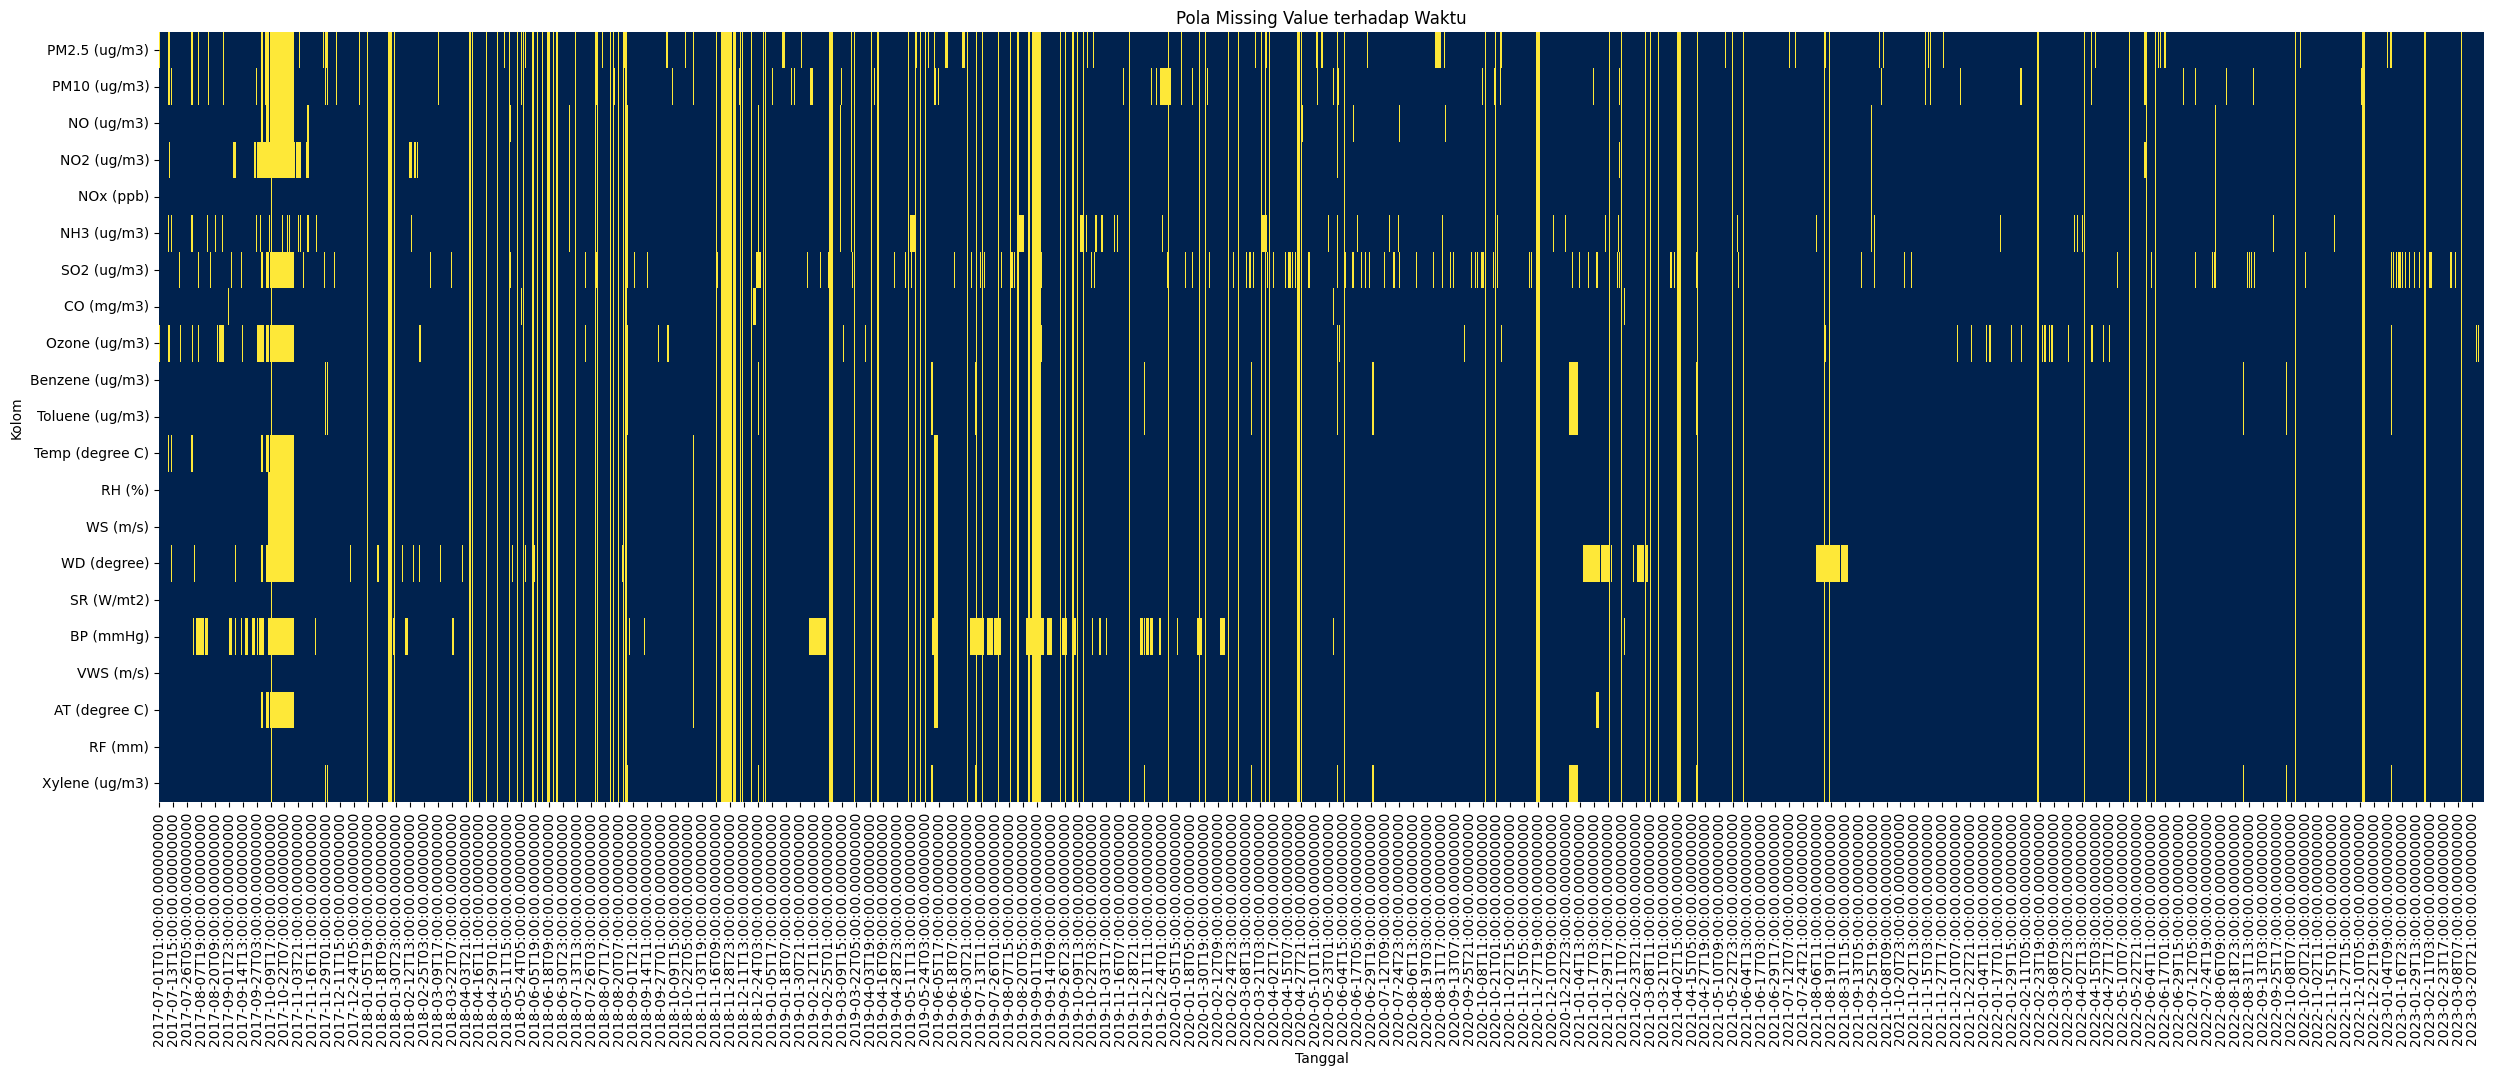

In [ ]:
plt.figure(figsize=(30, 10))
sns.heatmap(data_idx.isnull().T, cbar=False, cmap='cividis')
plt.title('Pola Missing Value terhadap Waktu')
plt.ylabel('Kolom')
plt.xlabel('Tanggal')
plt.show()

Dari kedua output diatas, dapat dilihat bahwa banyak blok kuning vertikal panjang yang menandakan periode besar di mana data dari berbagai kolom hilang secara bersamaan. Oleh karena itu, metode imputasi seperti forward fill, backward fill, atau interpolate menjadi tidak efektif untuk mengisi kekosongan data ini.

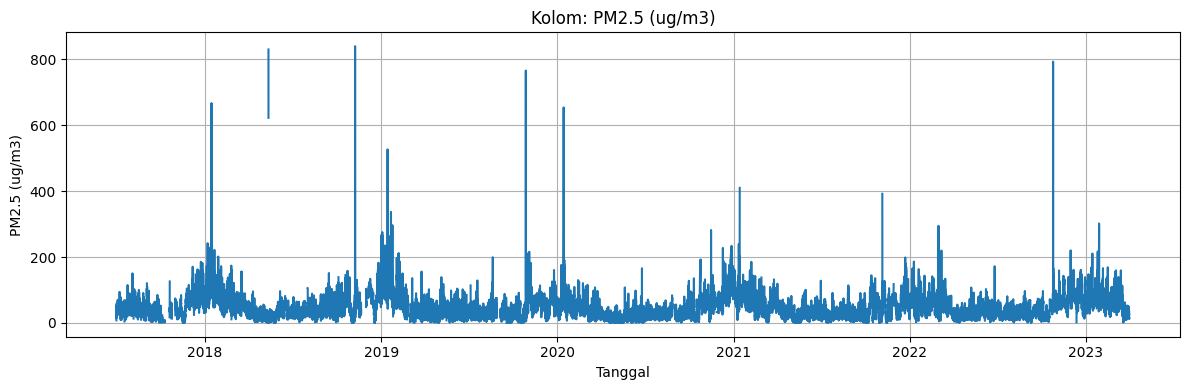

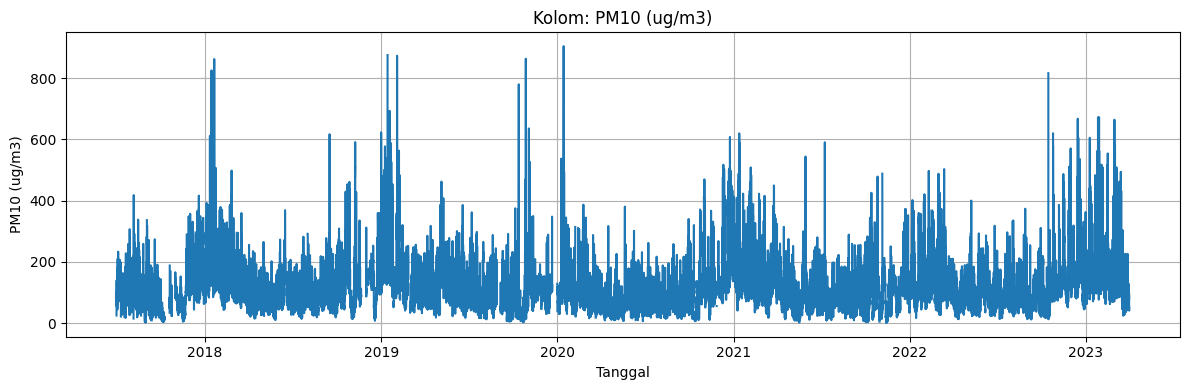

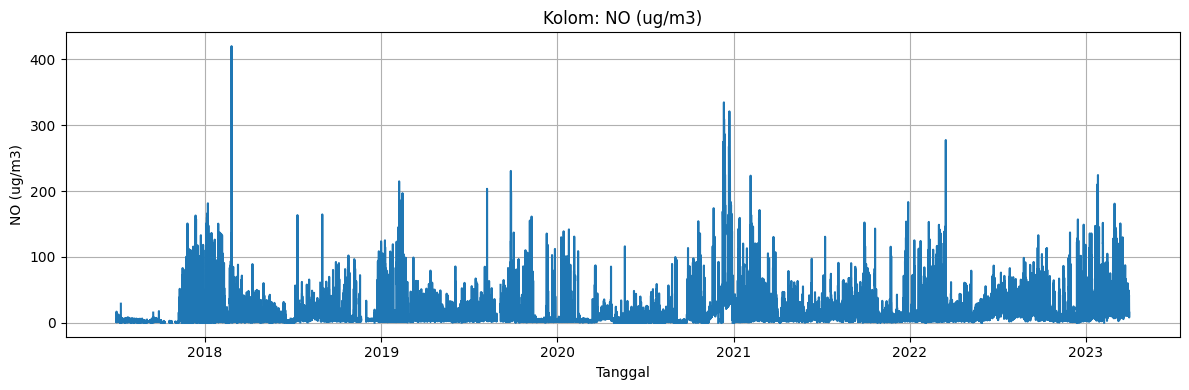

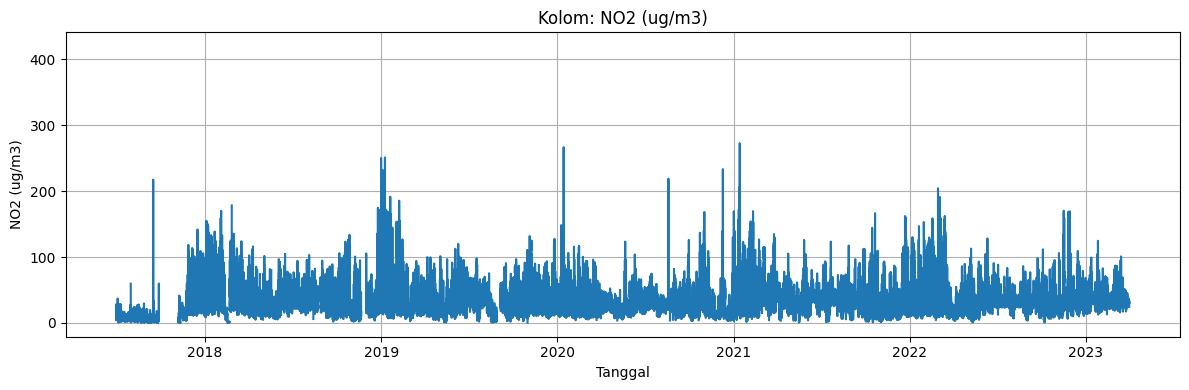

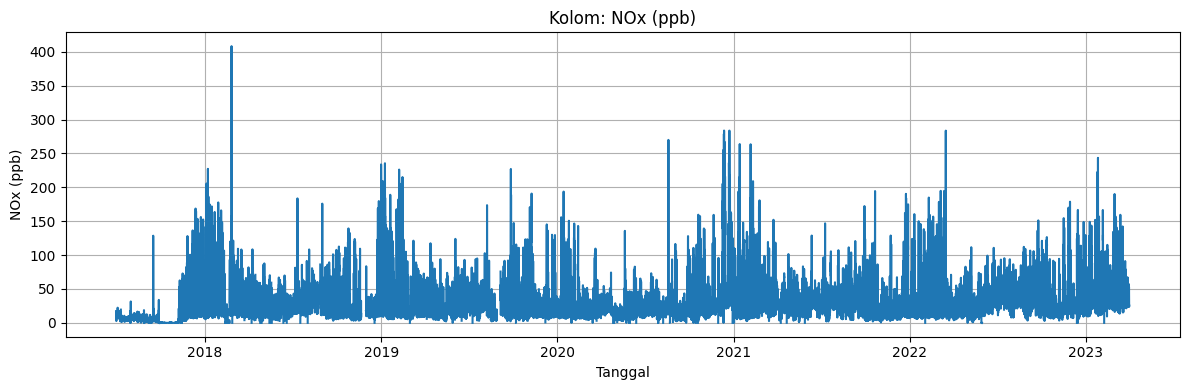

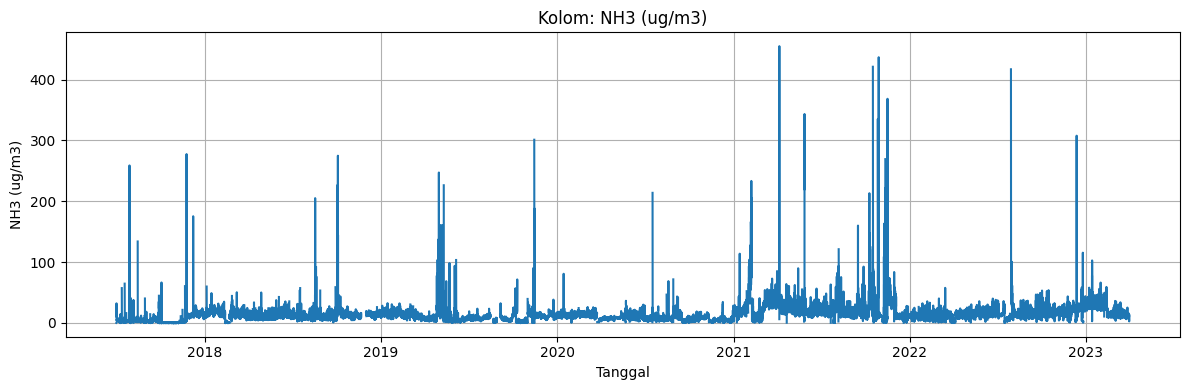

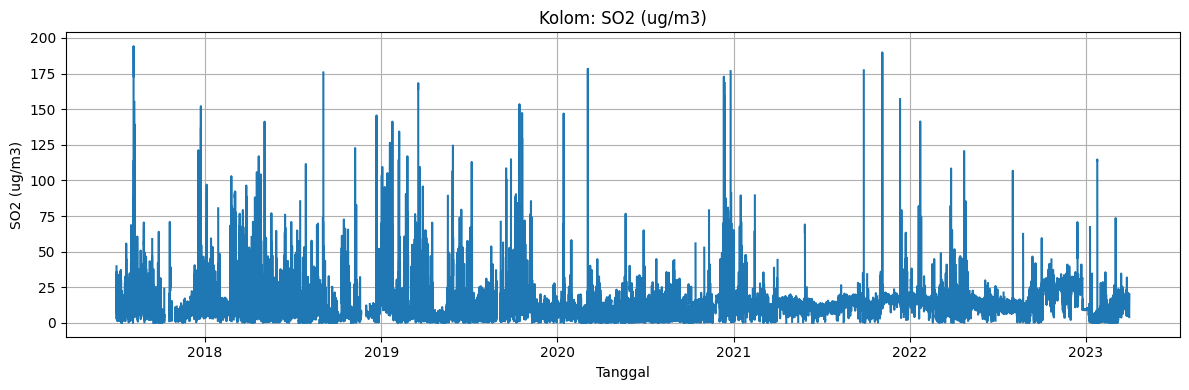

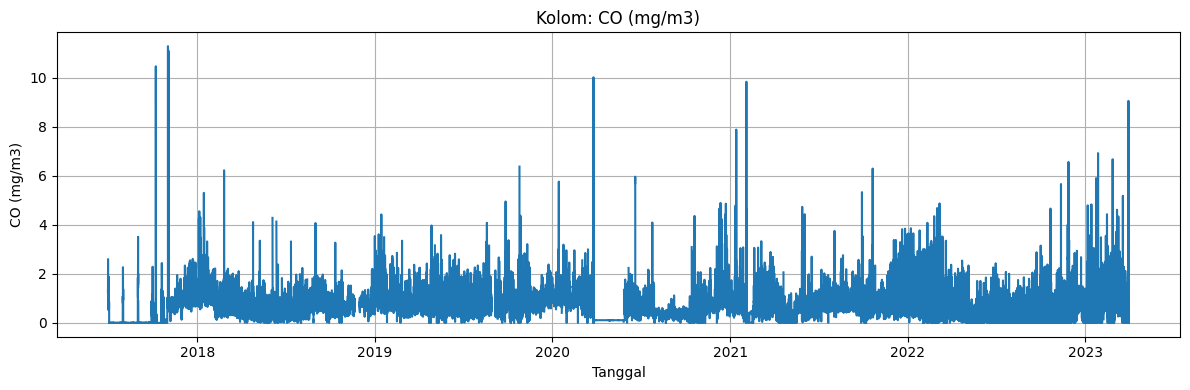

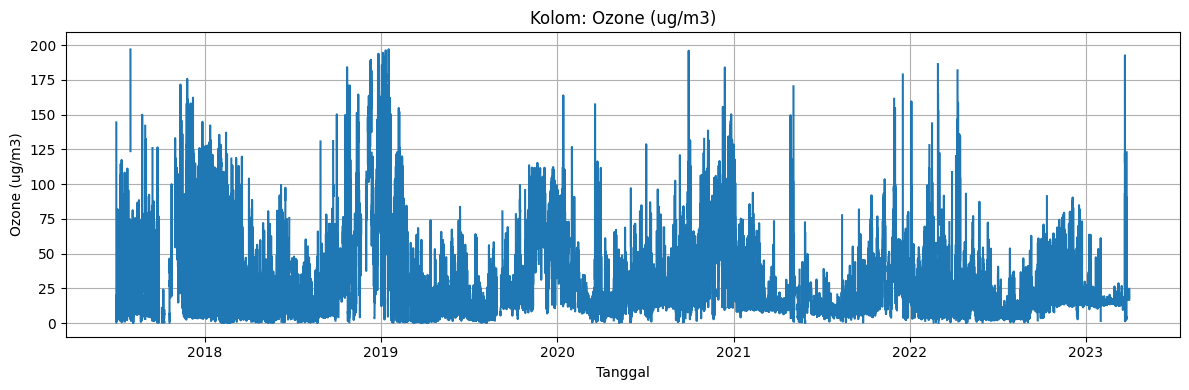

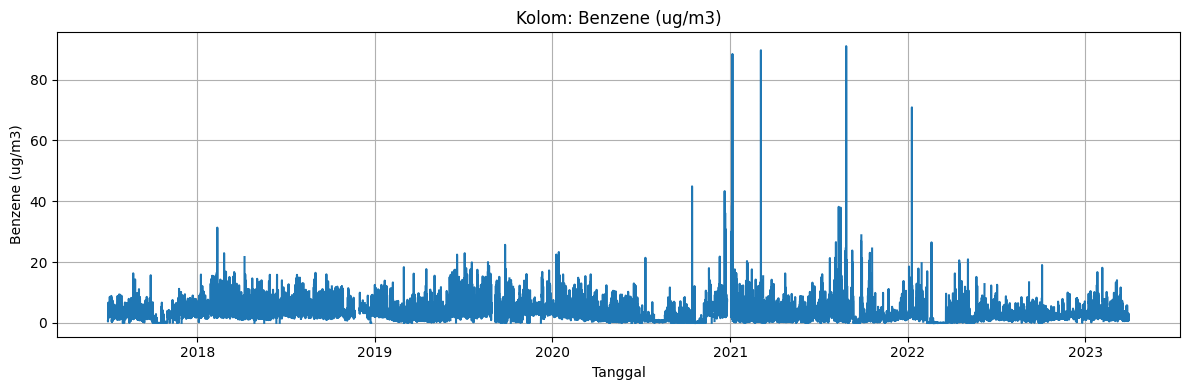

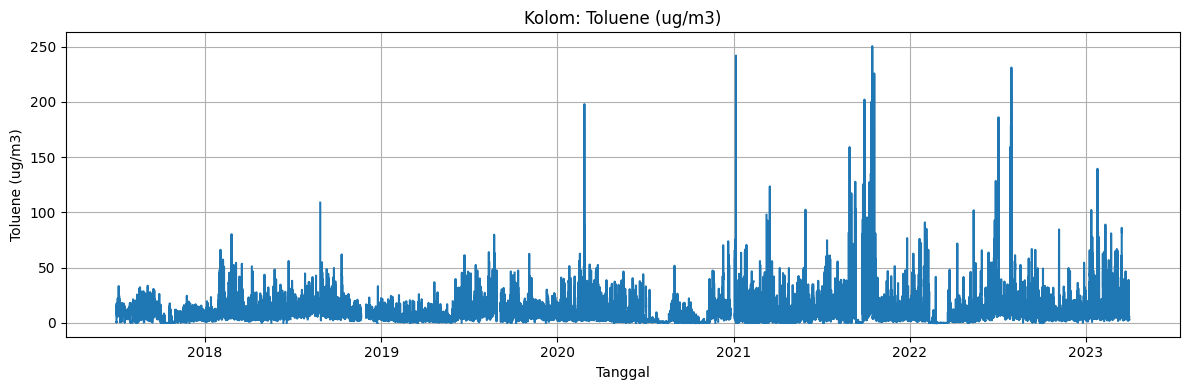

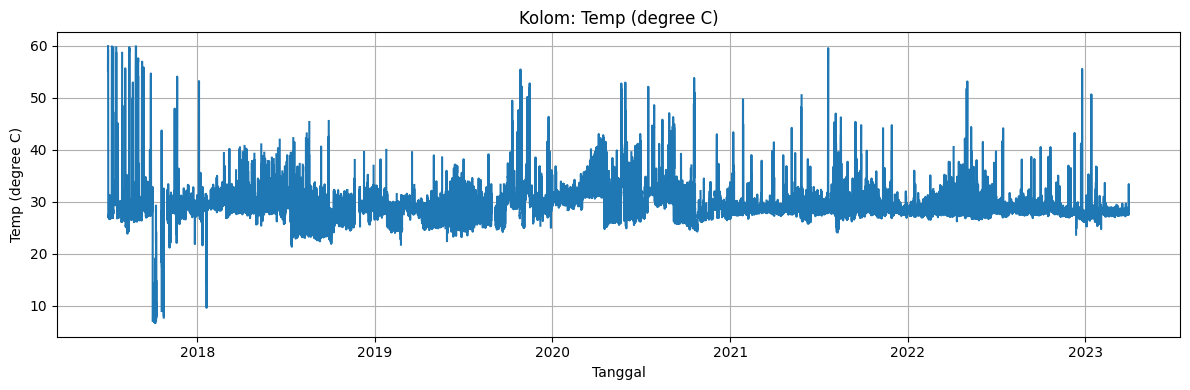

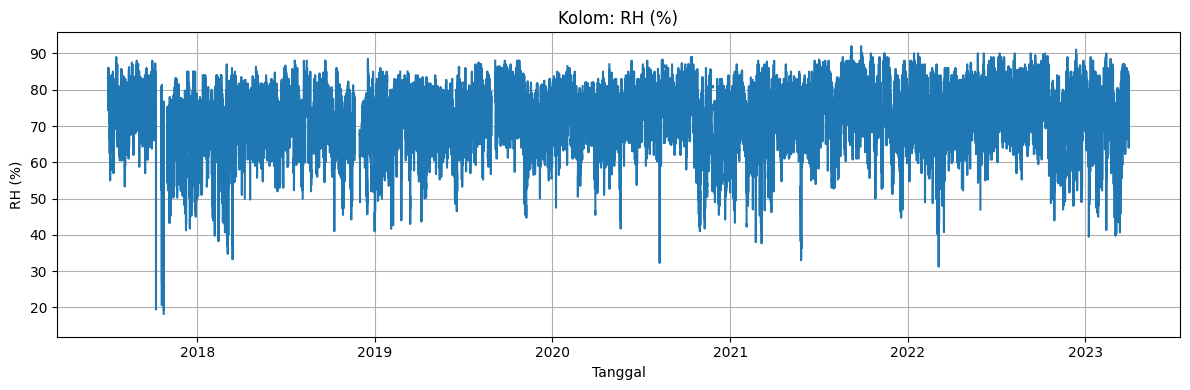

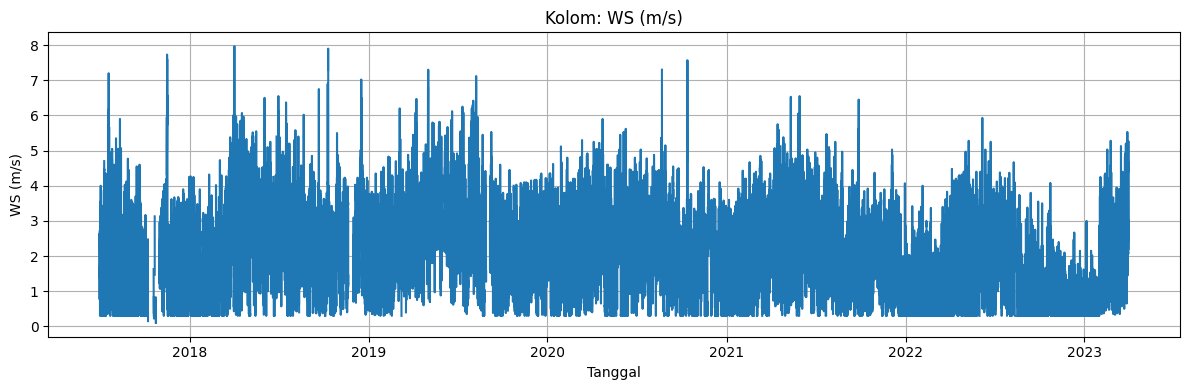

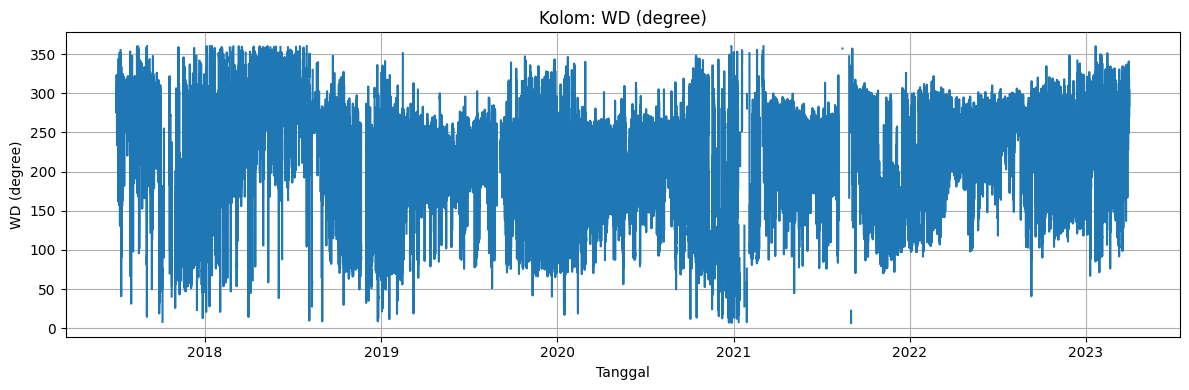

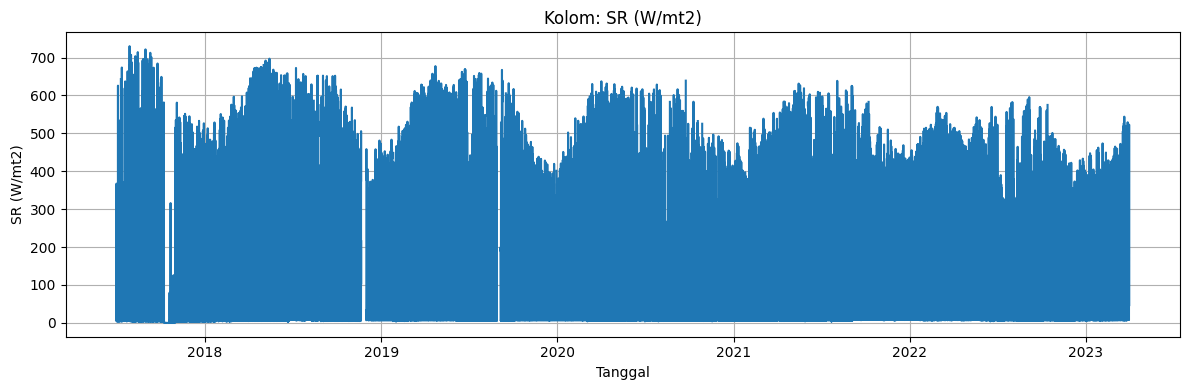

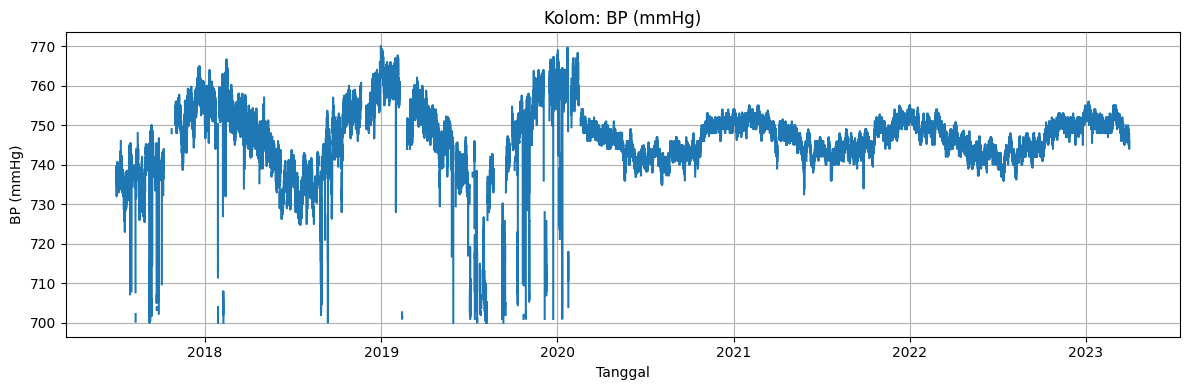

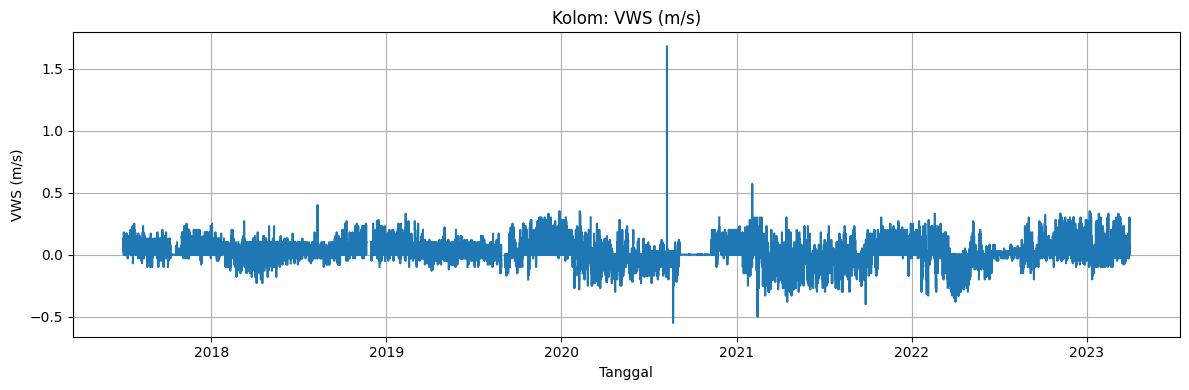

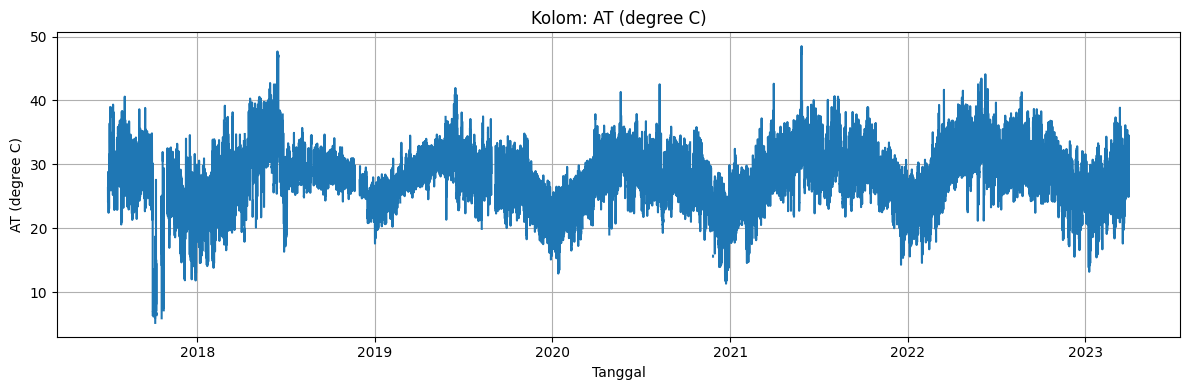

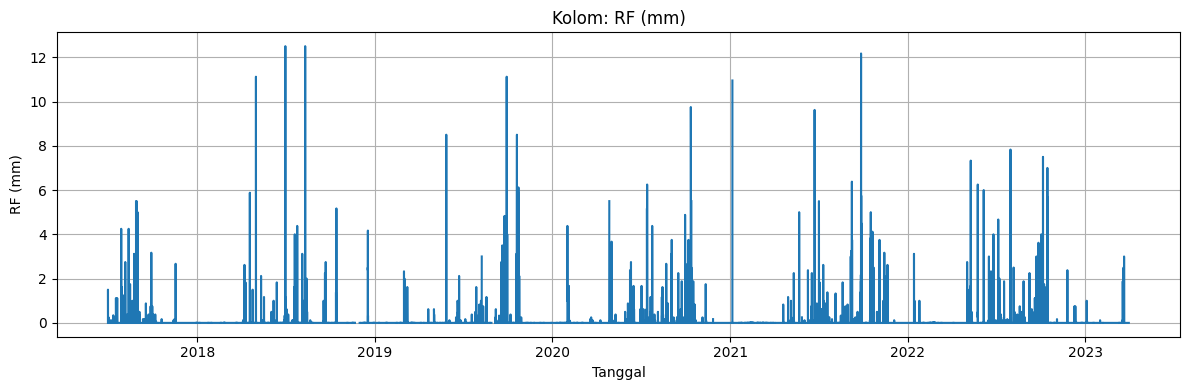

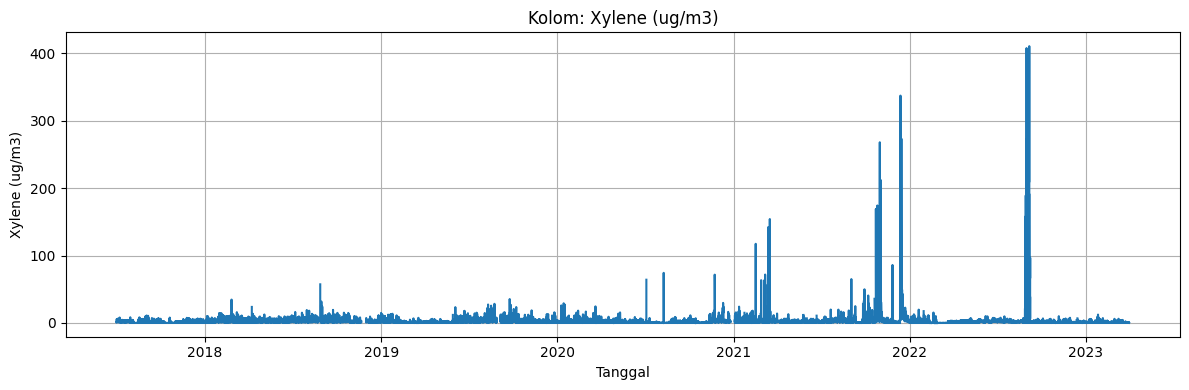

In [ ]:
for col in data_idx.columns:
  plt.figure(figsize=(12, 4))
  plt.plot(data_idx.index, data_idx[col], label=col, color='tab:blue')
  plt.title(f'Kolom: {col}')
  plt.xlabel('Tanggal')
  plt.ylabel(col)
  plt.grid(True)
  plt.tight_layout()
  plt.show()

Beberapa variable seperti di `AT (degree C)`, `PM2.5`, dan `PM10` menunjukkan pola musiman yang jelas, sehingga metode imputasi berbasis seasonal decomposition (STL) dianggap lebih sesuai untuk memperkirakan nilai yang hilang secara lebih akurat. Oleh karena itu digunakan period=168 pada STL karena ingin menangkap pola musiman mingguan (7 hari x 24 jam) di data per jam ini.

### Seasonal Decomposition of Time Series by Loess (STL)

> Pola musiman mingguan dipilih karena lebih responsif terhadap variasi jangka pendek dan lebih efisien secara komputasi. Sementara itu, pendekatan berbasis pola bulanan atau tahunan cenderung memerlukan waktu komputasi yang lebih lama, hanya mampu menangkap tren musiman berskala besar, serta membutuhkan data dalam jumlah besar dengan sedikit missing value agar hasilnya tetap akurat.

In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
# copy dataset
data_impute = data_idx.copy()

In [ ]:
numeric_cols = data_idx.select_dtypes(include='number').columns

def stl_impute(series, period=168): # 7 hari * 24 jam (pola mingguan)
  temp = series.interpolate(method='linear', limit_direction='both')
  try:
    result = STL(temp, seasonal=period, robust=True).fit()
    trend = result.trend.interpolate(limit_direction='both')
    seasonal = result.seasonal
    resid = result.resid.interpolate(limit_direction='both')
    filled = trend + seasonal + resid
    return series.combine_first(filled)

  except:
    return series.interpolate(method='linear', limit_direction='both')


# Untuk semua kolom
for col in numeric_cols:
  data_impute[col] = stl_impute(data_idx[col])
  print(f"{col}: imputasi selesai. Sisa missing = {data_impute[col].isna().sum()}")


PM2.5 (ug/m3): imputasi selesai. Sisa missing = 0
PM10 (ug/m3): imputasi selesai. Sisa missing = 0
NO (ug/m3): imputasi selesai. Sisa missing = 0
NO2 (ug/m3): imputasi selesai. Sisa missing = 0
NOx (ppb): imputasi selesai. Sisa missing = 0
NH3 (ug/m3): imputasi selesai. Sisa missing = 0
SO2 (ug/m3): imputasi selesai. Sisa missing = 0
CO (mg/m3): imputasi selesai. Sisa missing = 0
Ozone (ug/m3): imputasi selesai. Sisa missing = 0
Benzene (ug/m3): imputasi selesai. Sisa missing = 0
Toluene (ug/m3): imputasi selesai. Sisa missing = 0
Temp (degree C): imputasi selesai. Sisa missing = 0
RH (%): imputasi selesai. Sisa missing = 0
WS (m/s): imputasi selesai. Sisa missing = 0
WD (degree): imputasi selesai. Sisa missing = 0
SR (W/mt2): imputasi selesai. Sisa missing = 0
BP (mmHg): imputasi selesai. Sisa missing = 0
VWS (m/s): imputasi selesai. Sisa missing = 0
AT (degree C): imputasi selesai. Sisa missing = 0
RF (mm): imputasi selesai. Sisa missing = 0
Xylene (ug/m3): imputasi selesai. Sisa mis

Sudah tidak ada missing value.

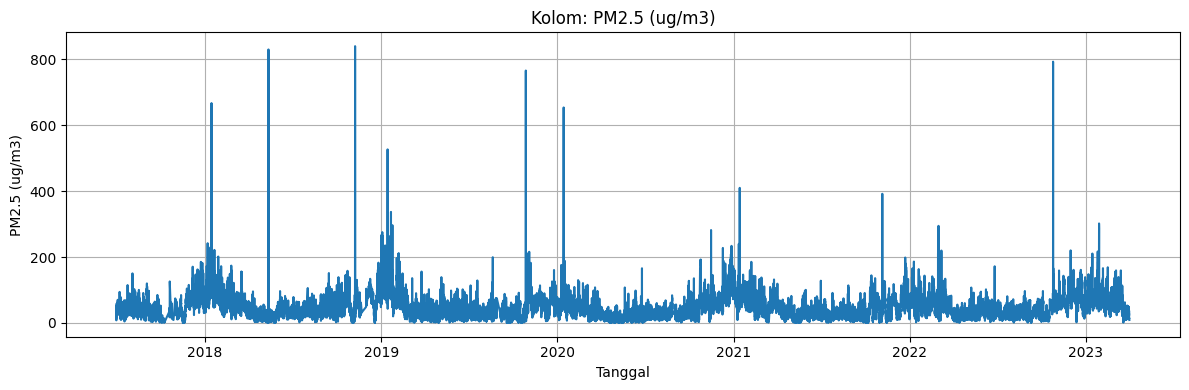

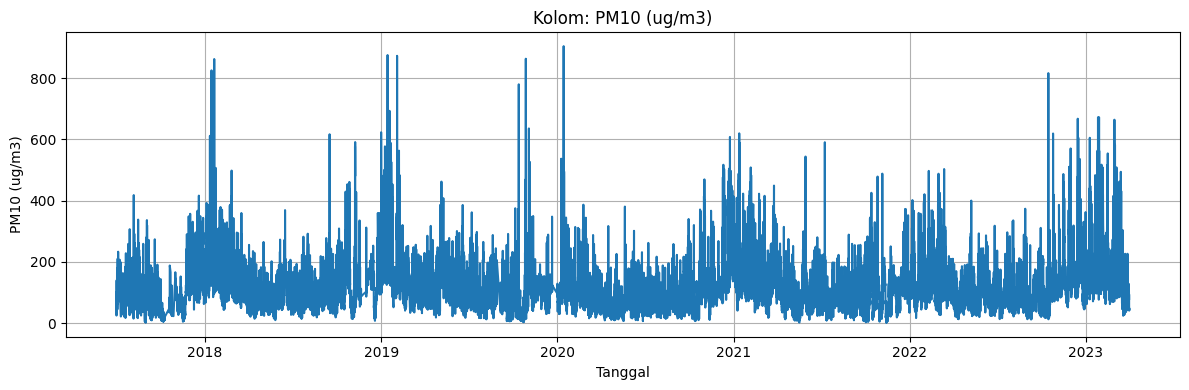

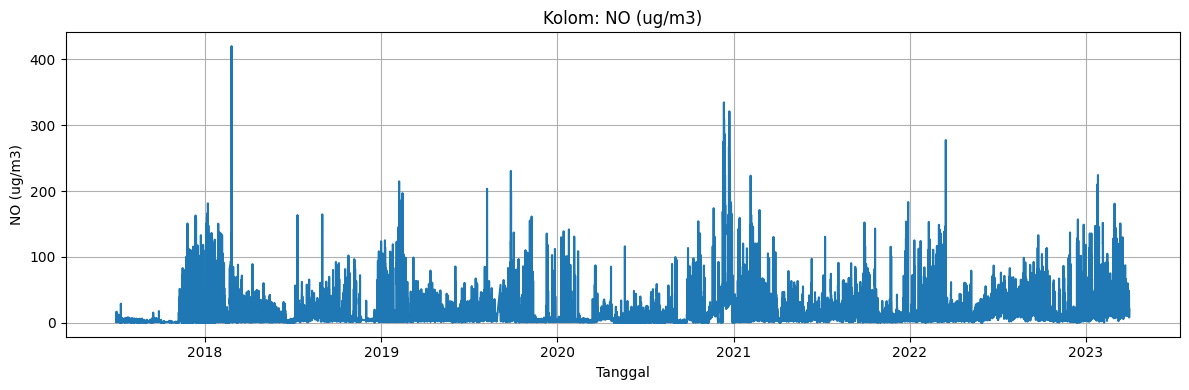

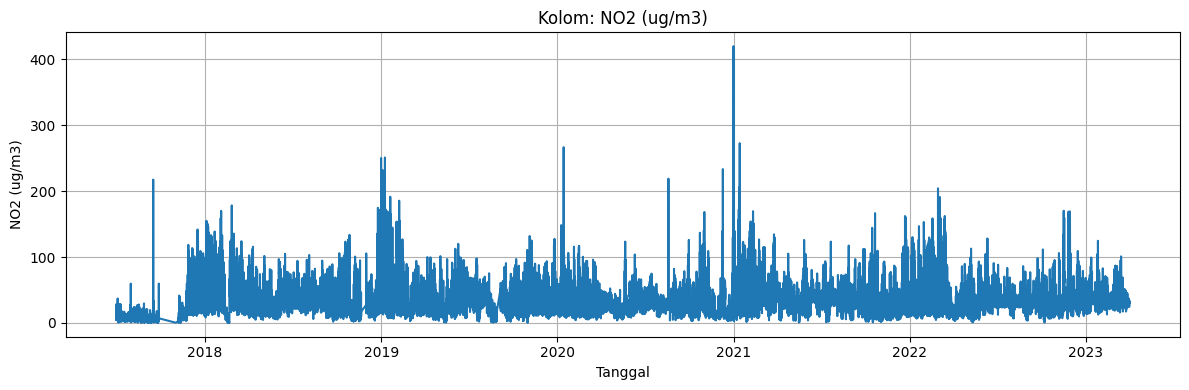

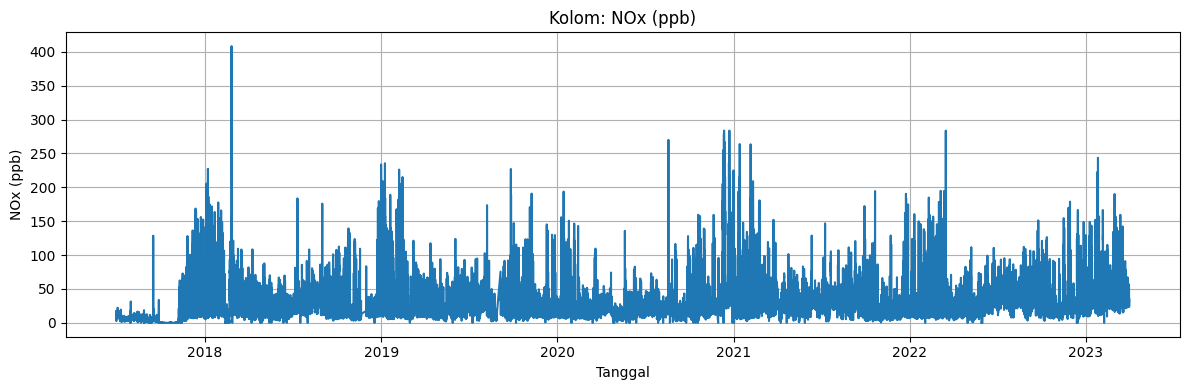

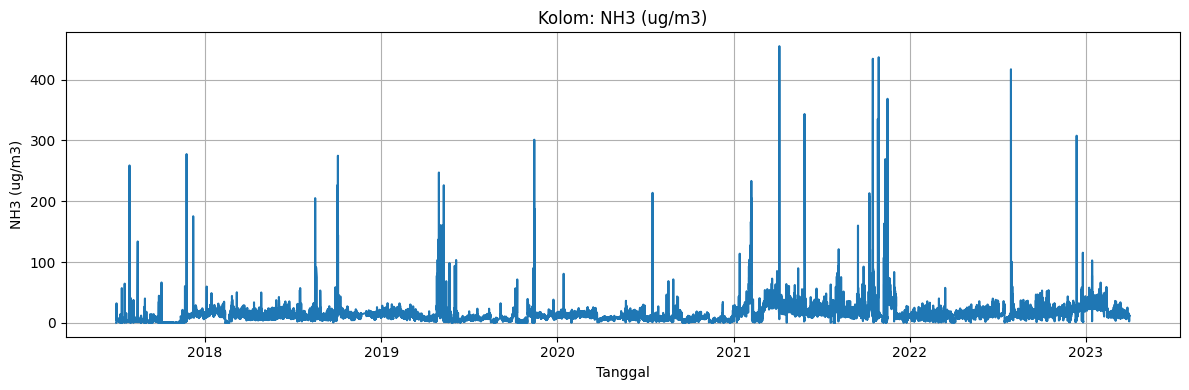

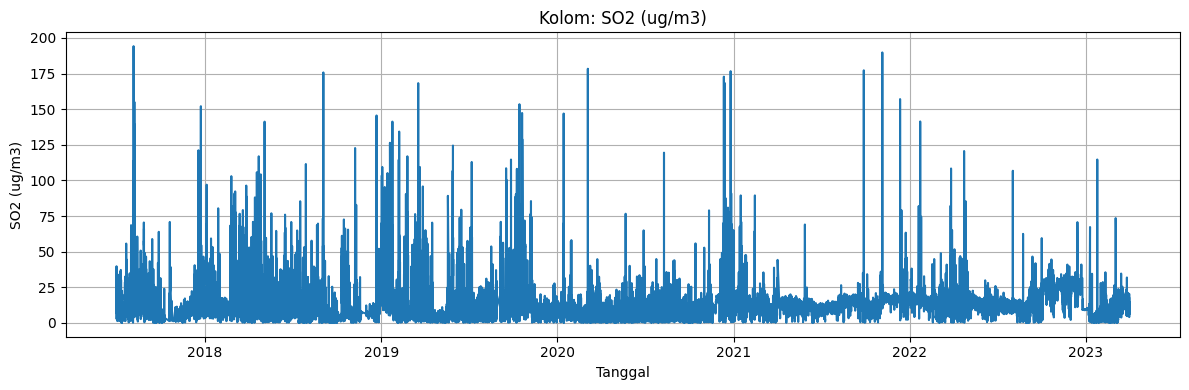

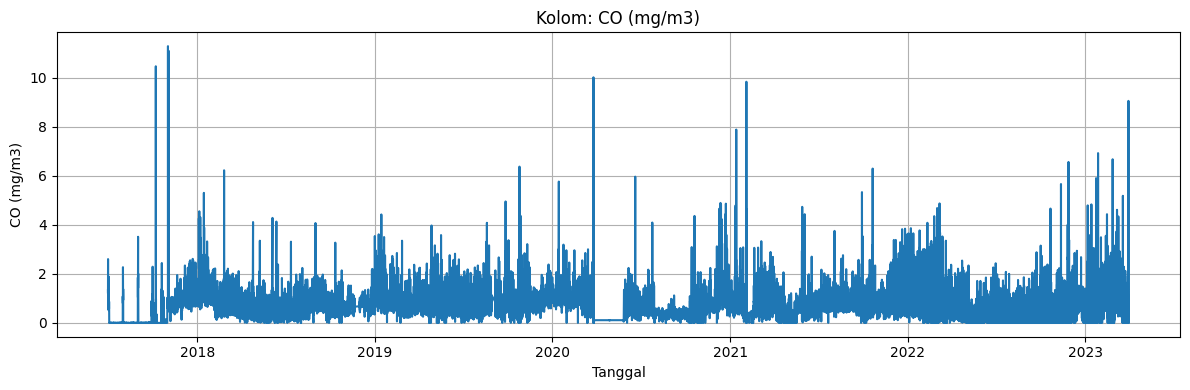

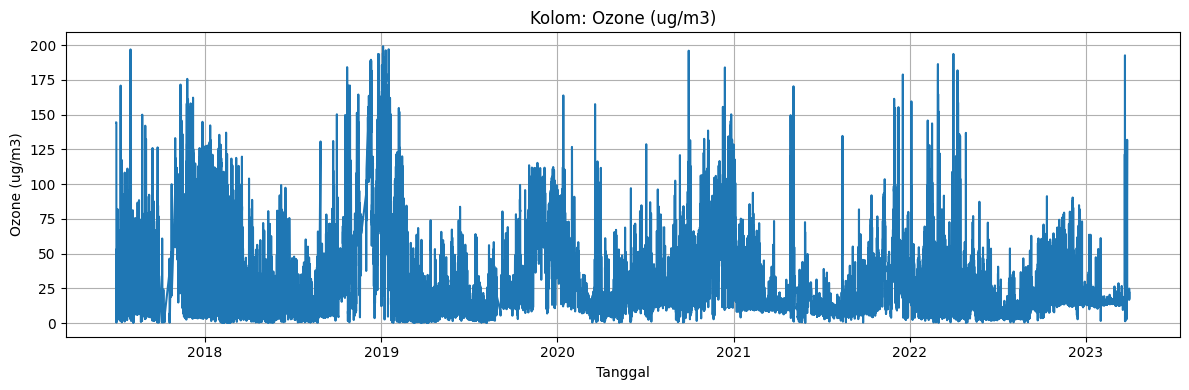

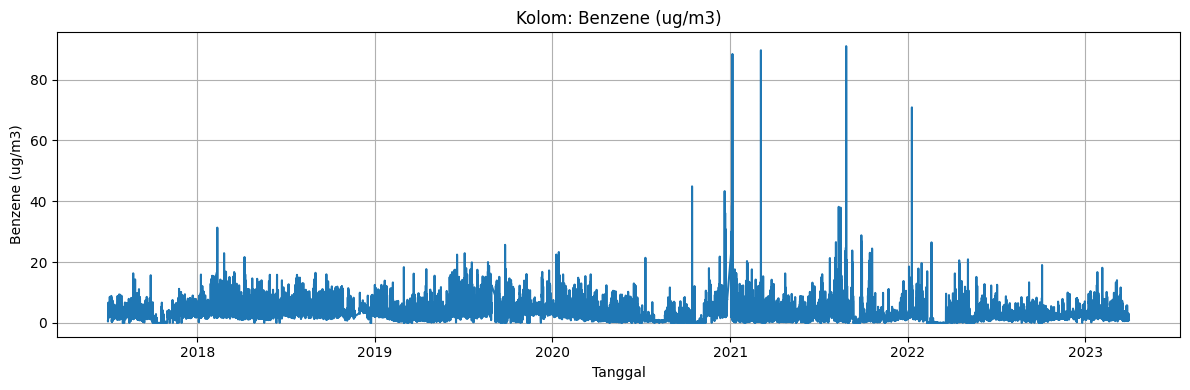

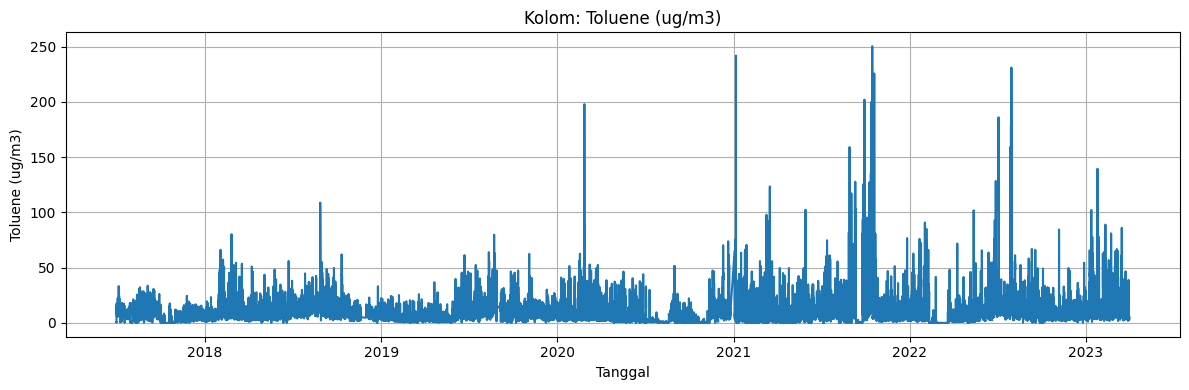

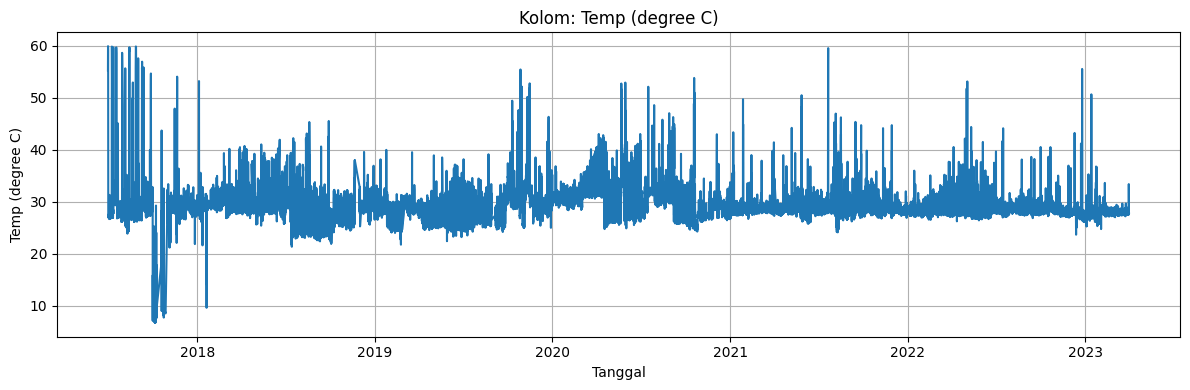

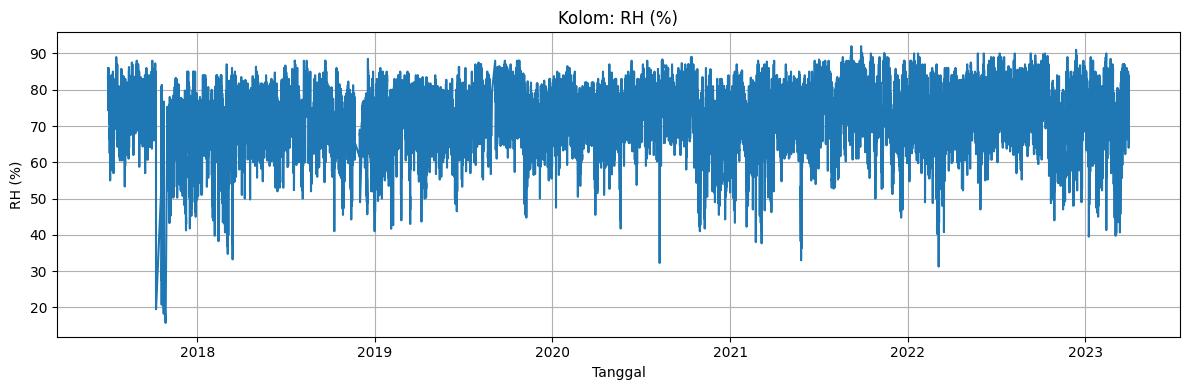

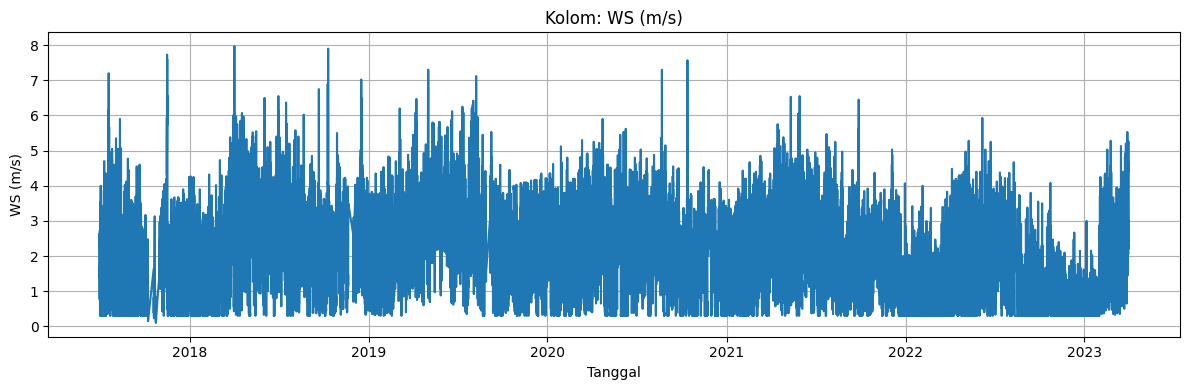

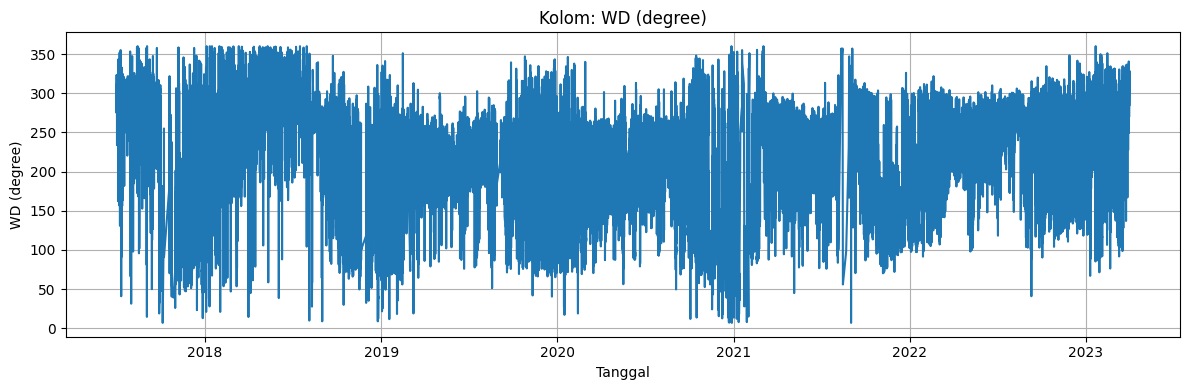

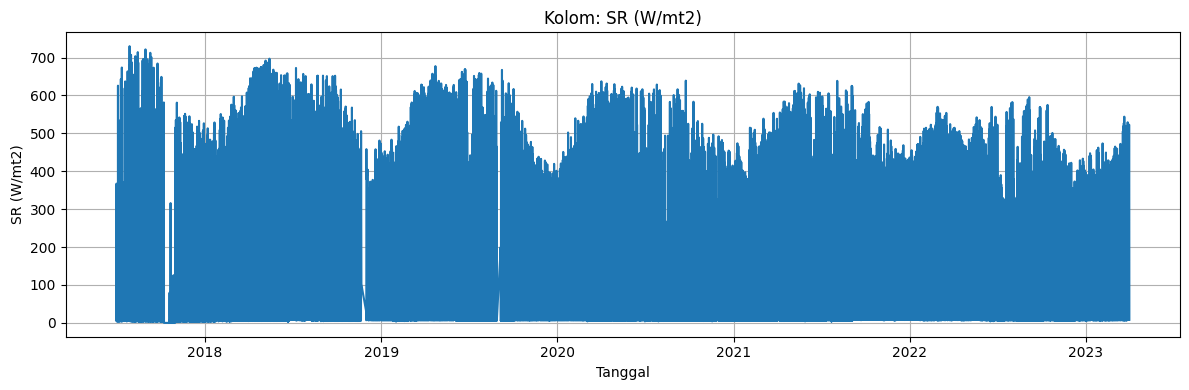

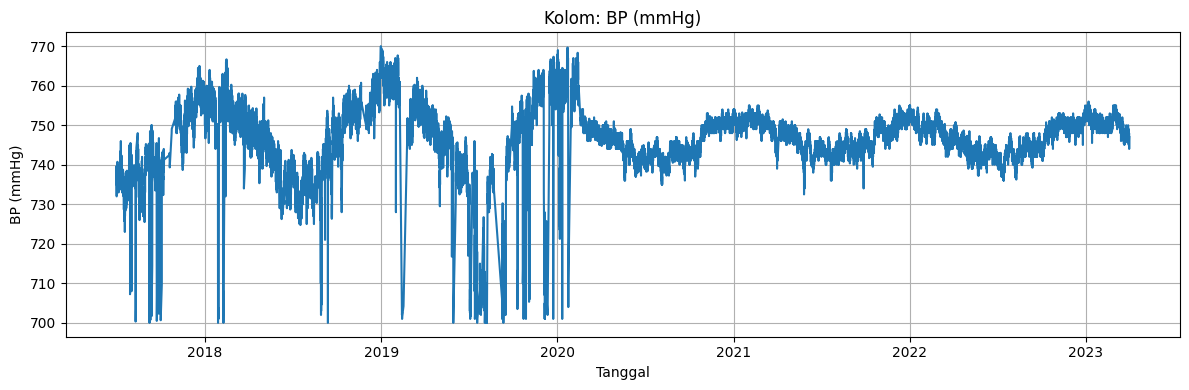

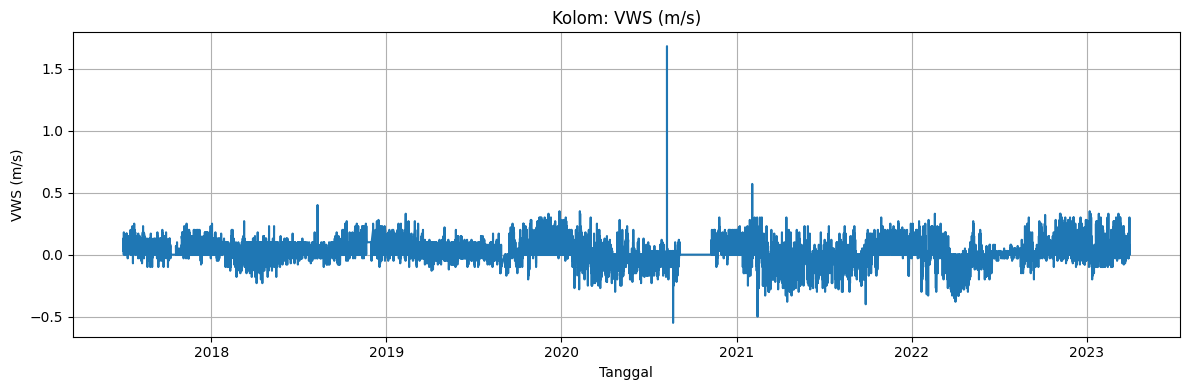

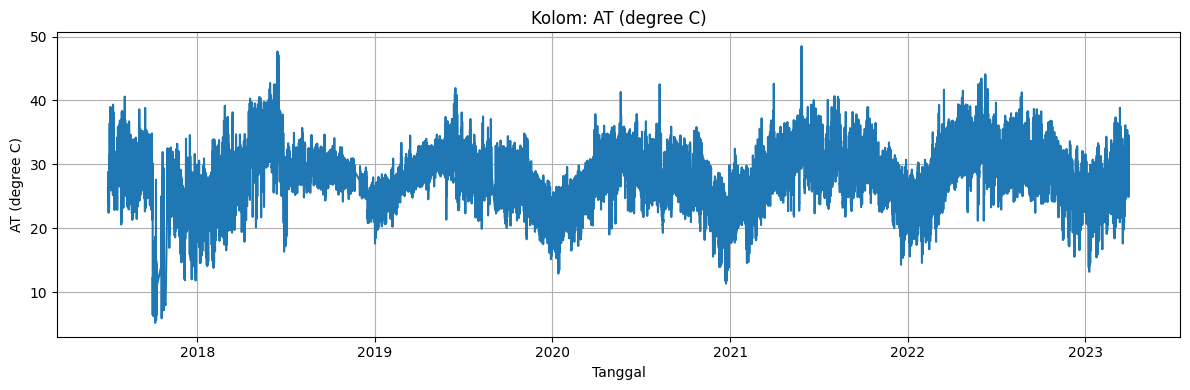

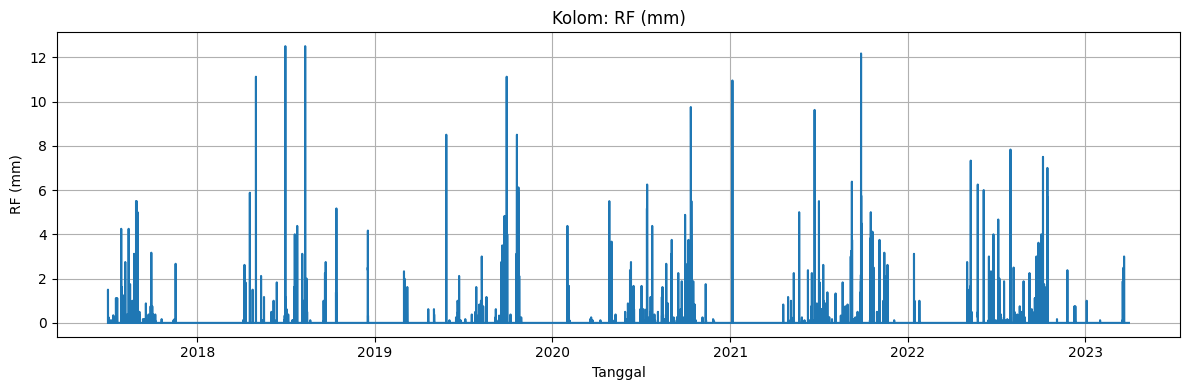

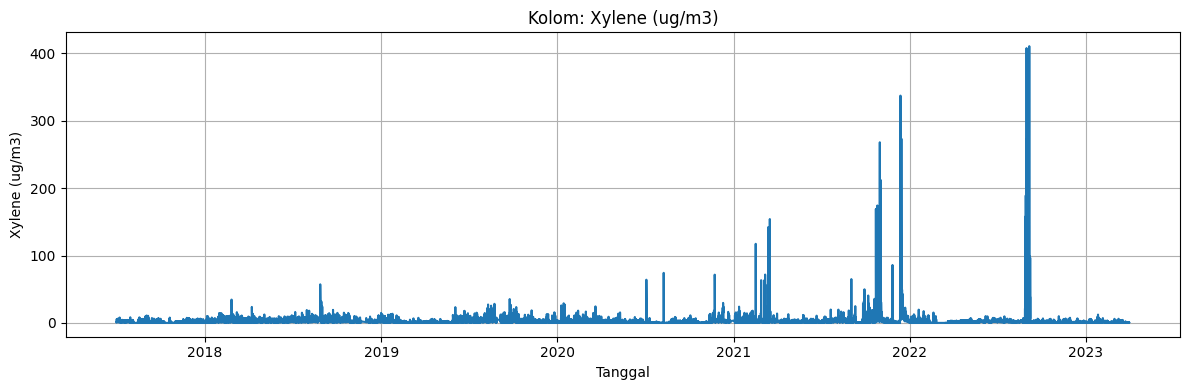

In [ ]:
for col in data_impute.columns:
  plt.figure(figsize=(12, 4))
  plt.plot(data_impute.index, data_impute[col], label=col, color='tab:blue')
  plt.title(f'Kolom: {col}')
  plt.xlabel('Tanggal')
  plt.ylabel(col)
  plt.grid(True)
  plt.tight_layout()
  plt.show()

Missing value telah terisi tanpa mengubah pola musiman yang dimiliki oleh variabel.

## Check Distribution

In [ ]:
len(data_impute.columns)

21

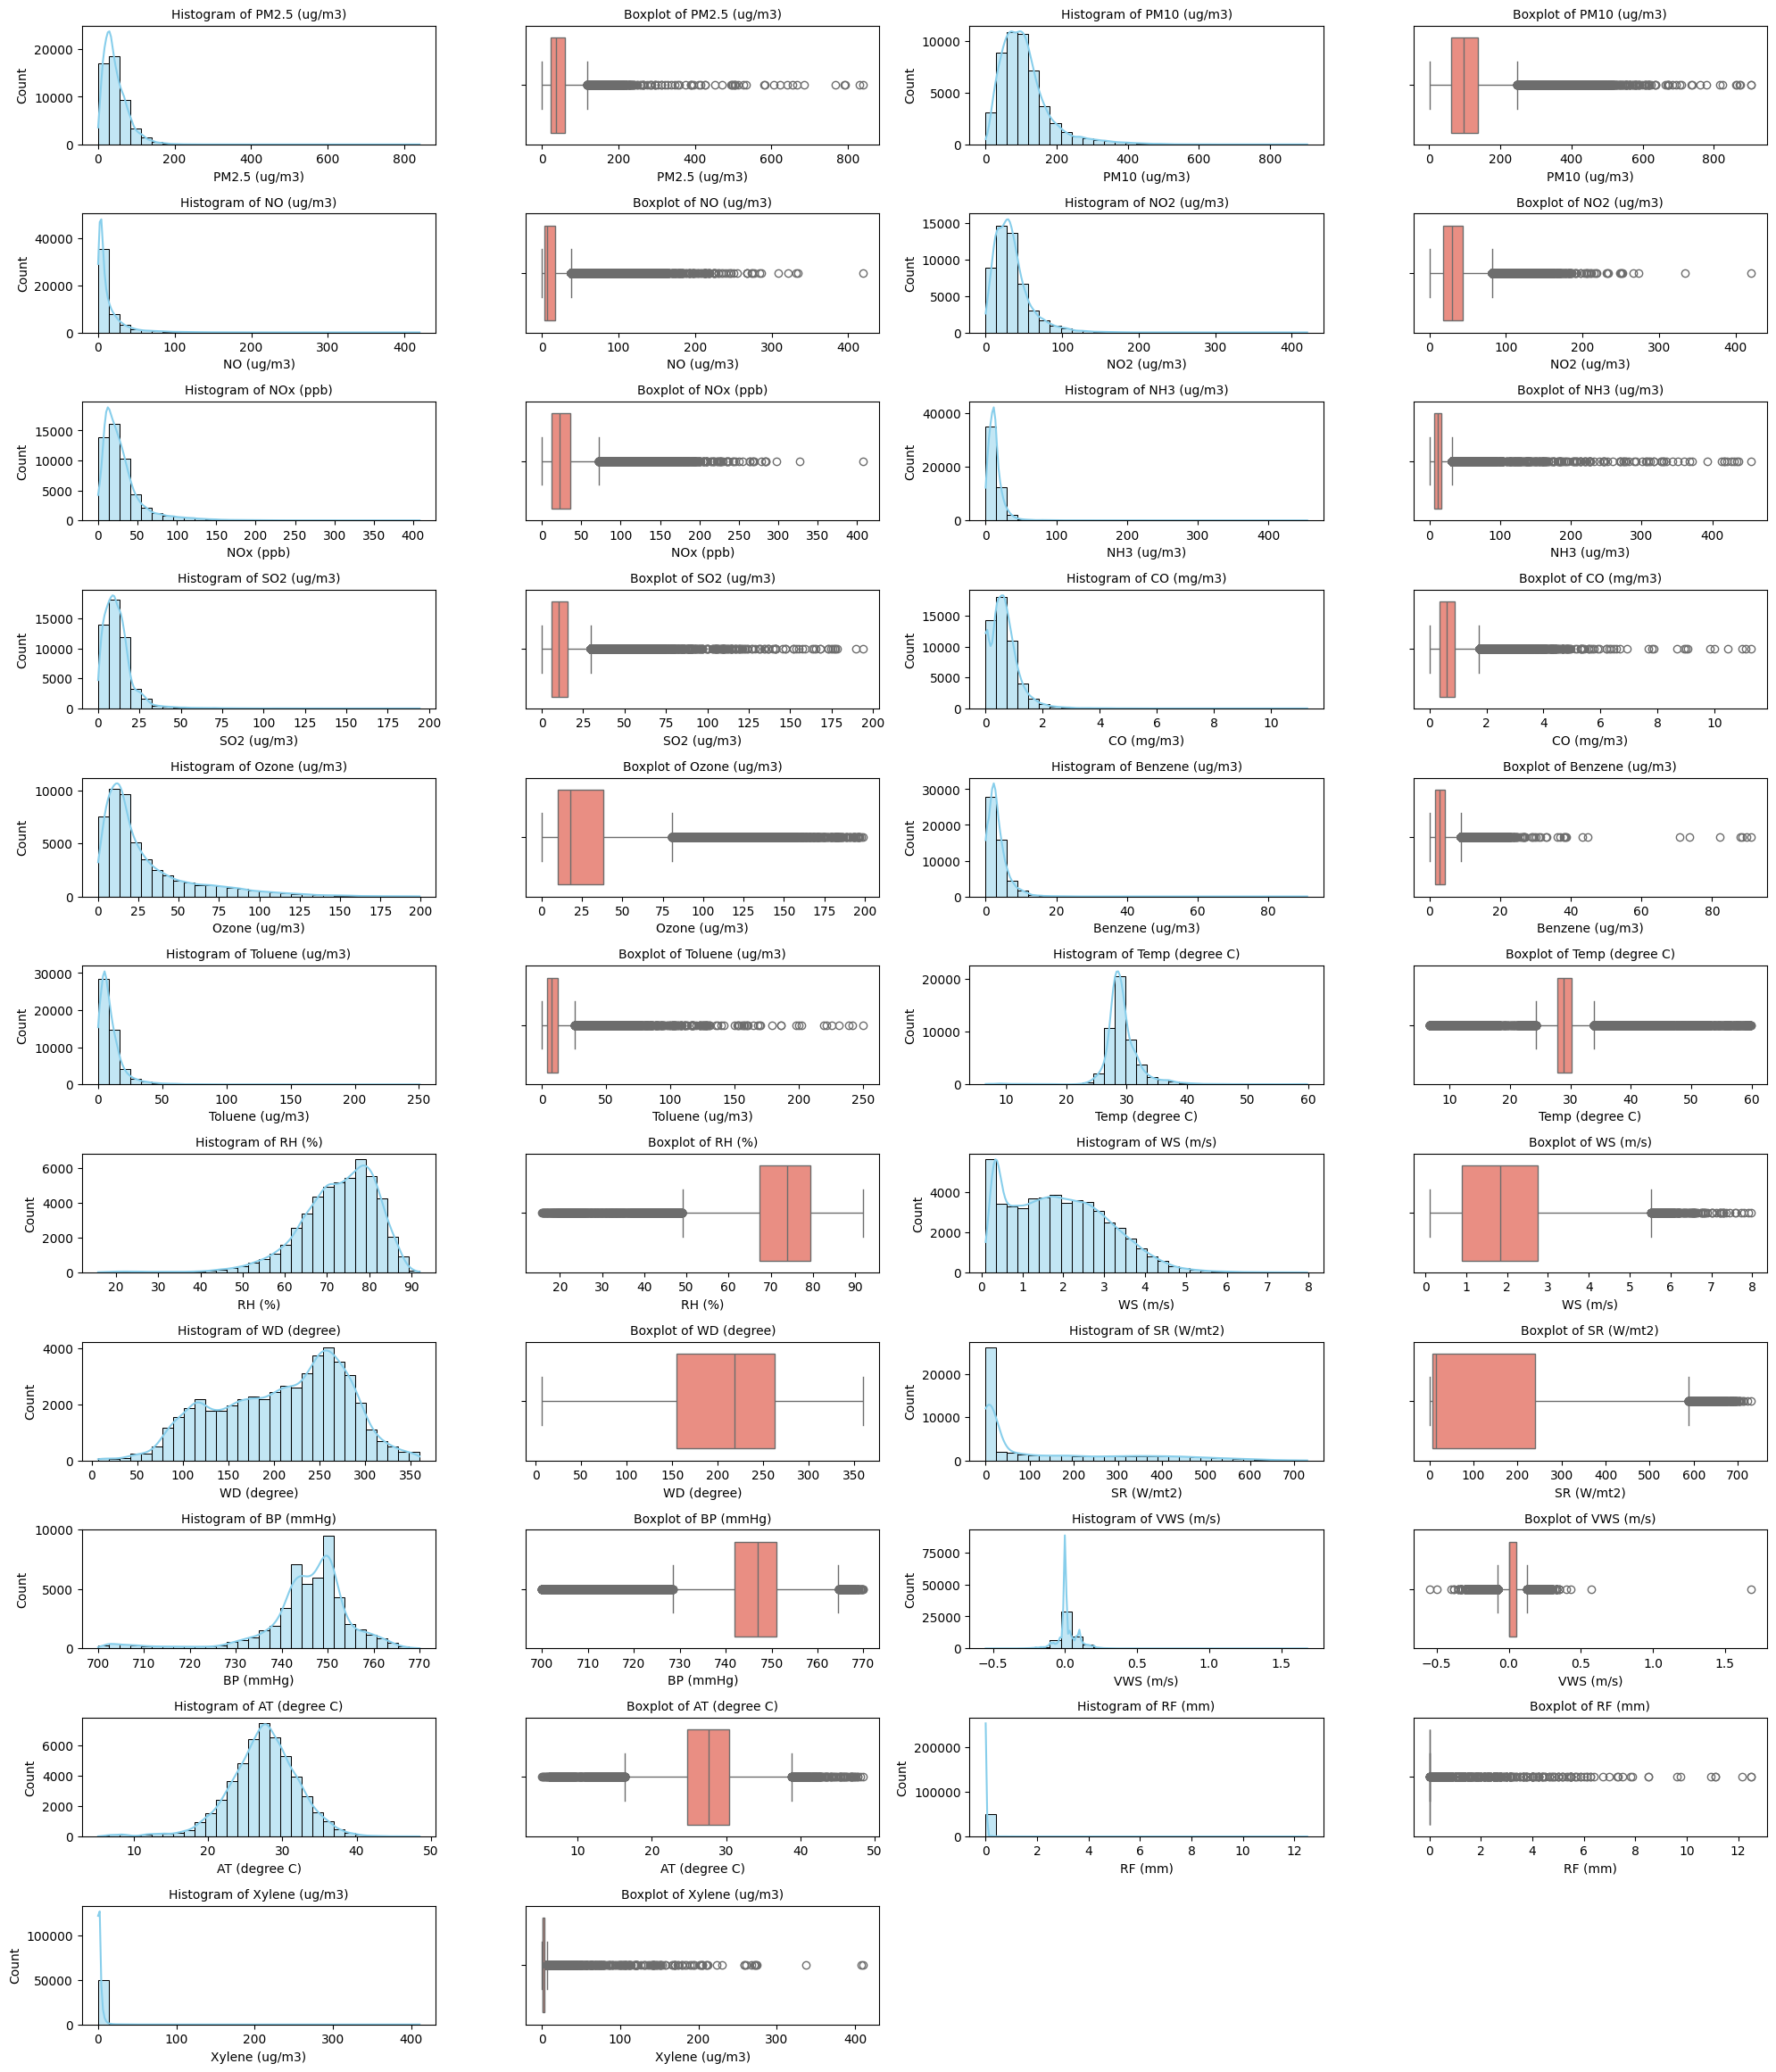

In [ ]:
n_cols = 4
n_rows = 6

# Ukuran plot keseluruhan
plt.figure(figsize=(20, 25))

for idx, col in enumerate(data_impute.columns):
  plt.subplot(n_rows * 2, n_cols, idx * 2 + 1)
  sns.histplot(data_impute[col], bins=30, kde=True, color='skyblue')
  plt.title(f"Histogram of {col}", fontsize=10)

  plt.subplot(n_rows * 2, n_cols, idx * 2 + 2)
  sns.boxplot(x=data_impute[col], color='salmon')
  plt.title(f"Boxplot of {col}", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
data_impute[numeric_cols].describe()

PM2.5 (ug/m3)  PM10 (ug/m3)    NO (ug/m3)   NO2 (ug/m3)     NOx (ppb)  \
count   50400.000000  50400.000000  50400.000000  50400.000000  50400.000000   
mean       46.076725    110.866940     14.446998     34.030798     29.576807   
std        34.596856     72.938433     21.833941     23.834368     26.649710   
min         0.250000      1.000000      0.030000      0.030000      0.000000   
25%        23.000000     62.750000      2.880000     17.750000     12.720000   
50%        38.000000     97.670000      6.400000     29.650000     22.670000   
75%        61.500000    136.750000     16.900000     43.250000     36.620000   
max       840.000000    904.000000    419.780000    420.200000    408.250000   

        NH3 (ug/m3)   SO2 (ug/m3)    CO (mg/m3)  Ozone (ug/m3)  \
count  50400.000000  50400.000000  50400.000000   50400.000000   
mean      13.889019     12.135878      0.673219      29.651395   
std       15.882217     10.567917      0.545399      29.947603   
min        0.020000      0.030000      0.000000       0.100000   
25%        6.800000      6.000000      0.340000      10.030000   
50%       11.516250     10.350000      0.600000      17.920000   
75%       16.722500     15.330000      0.900000      38.285000   
max      454.900000    194.250000     11.280000     199.300000   

       Benzene (ug/m3)  ...  Temp (degree C)        RH (%)      WS (m/s)  \
count     50400.000000  ...     50400.000000  50400.000000  50400.000000   
mean          3.393034  ...        29.346574     72.578782      1.917879   
std           3.013132  ...         3.907355      9.496132      1.190432   
min           0.000000  ...         6.700000     15.750000      0.100000   
25%           1.530000  ...        27.880000     67.332812      0.900000   
50%           2.750000  ...        28.880000     74.000000      1.830000   
75%           4.470000  ...        30.280000     79.500000      2.750000   
max          91.000000  ...        59.880000     92.000000      7.970000   

        WD (degree)    SR (W/mt2)     BP (mmHg)     VWS (m/s)  AT (degree C)  \
count  50400.000000  50400.000000  50400.000000  50400.000000   50400.000000   
mean     208.116428    132.212508    745.269442      0.017685      27.477300   
std       69.138167    174.908796     10.367224      0.071678       4.747822   
min        7.000000      0.000000    700.000000     -0.550000       5.180000   
25%      154.487500      6.513333    742.000000      0.000000      24.800000   
50%      218.330000     14.250000    747.000000      0.000000      27.650000   
75%      262.750000    239.000000    751.000000      0.050000      30.420000   
max      360.000000    730.000000    770.000000      1.680000      48.500000   

            RF (mm)  Xylene (ug/m3)  
count  50400.000000    50400.000000  
mean       0.023116        2.659987  
std        0.282006        8.554161  
min        0.000000        0.000000  
25%        0.000000        0.600000  
50%        0.000000        1.350000  
75%        0.000000        2.830000  
max       12.500000      410.850000  

[8 rows x 21 columns]

Terdapat nilai yang tidak wajar di variable `VWS (m/s)`, bernilai -0.55. Oleh karena itu, nilai negatif akan diubah jadi 0.

In [ ]:
# impute menjadi 0
data_impute.loc[data_impute['VWS (m/s)'] < 0, 'VWS (m/s)'] = 0

In [ ]:
data_impute['VWS (m/s)'].min()

0.0

In [ ]:
data_impute.shape

(50400, 21)

Nilai tidak wajar di `VWS (m/s)` sudah diubah menjadi 0.

## Window Size

Window size yang digunakan adalah 5, sesuai dengan ketentuan soal. Tidak dilakukan pencarian atau penyesuaian window size lebih lanjut.

# Data Splitting

In [ ]:
val_prop = test_prop = 0.1
train_size = int(len(data_impute) * (1 - val_prop - test_prop))
val_size = int(len(data_impute) * val_prop)

data_train = data_impute.iloc[:train_size]
data_val = data_impute.iloc[train_size:train_size + val_size]
data_test = data_impute.iloc[train_size + val_size:]

print(f'Train: {data_train.shape}')
print(f'Validation: {data_val.shape}')
print(f'Test: {data_test.shape}')

Train: (40320, 21)
Validation: (5040, 21)
Test: (5040, 21)


# B. Data Preprocessing

## Scaling

Walaupun MinMaxScaler sering dipakai dalam LSTM, pada kasus ini MinMax tidak terlalu cocok karena aktivasi yang tertera di soal adalah linear, bukan sigmoid. Selain itu, data memiliki banyak outlier yang dapat mempengaruhi hasil normalisasi MinMax. Oleh karena itu, RobustScaler dipilih karena lebih tahan terhadap outlier dan lebih sesuai untuk skenario ini.

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
target_col = 'AT (degree C)'
feature_cols = [col for col in data_impute.columns if col != target_col]

print(f'Target: {target_col}')
print(f'Features: {feature_cols}')

Target: AT (degree C)
Features: ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'RF (mm)', 'Xylene (ug/m3)']


In [ ]:
# Scaling

scaler_x = RobustScaler()
data_train[feature_cols] = scaler_x.fit_transform(data_train[feature_cols])
data_val[feature_cols] = scaler_x.transform(data_val[feature_cols])
data_test[feature_cols] = scaler_x.transform(data_test[feature_cols])

scaler_y = RobustScaler()
data_train[[target_col]] = scaler_y.fit_transform(data_train[[target_col]])
data_val[[target_col]] = scaler_y.transform(data_val[[target_col]])
data_test[[target_col]] = scaler_y.transform(data_test[[target_col]])

/tmp/ipython-input-23-854302703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[feature_cols] = scaler_x.fit_transform(data_train[feature_cols])
/tmp/ipython-input-23-854302703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val[feature_cols] = scaler_x.transform(data_val[feature_cols])
/tmp/ipython-input-23-854302703.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

Scaling dipisah supaya nantinya output bisa inverse_transform.

In [ ]:
data_train.head(3)

PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
To Date                                                                     
2017-07-01 01:00:00       0.333710     -0.041022   -0.147098    -0.041971   
2017-07-01 02:00:00      -0.170127     -0.485422   -0.336558    -0.294526   
2017-07-01 03:00:00      -0.467848     -0.537458   -0.339226    -0.904380   

                     NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  \
To Date                                                                
2017-07-01 01:00:00  -0.149123    -1.108632     1.620472    1.320755   
2017-07-01 02:00:00  -0.415789    -1.108632    -0.156535    2.150943   
2017-07-01 03:00:00  -0.796053    -1.101017     0.123465    1.075472   

                     Ozone (ug/m3)  Benzene (ug/m3)  ...  Temp (degree C)  \
To Date                                              ...                    
2017-07-01 01:00:00       3.725096        -0.785714  ...         9.977099   
2017-07-01 02:00:00       3.725096        -0.827922  ...        10.839695   
2017-07-01 03:00:00       3.725096        -0.801948  ...        11.293893   

                       RH (%)  WS (m/s)  WD (degree)  SR (W/mt2)  BP (mmHg)  \
To Date                                                                       
2017-07-01 01:00:00  0.805695 -0.204600     0.671772   -0.037525  -1.031984   
2017-07-01 02:00:00  0.910449  0.267117     0.794311   -0.037525  -1.135182   
2017-07-01 03:00:00  1.036153 -0.716100     0.673260   -0.037861  -1.135182   

                     VWS (m/s)  AT (degree C)  RF (mm)  Xylene (ug/m3)  
To Date                                                                 
2017-07-01 01:00:00        0.6      -0.206093     0.00       -0.341564  
2017-07-01 02:00:00        1.0      -0.439068     1.50       -0.403292  
2017-07-01 03:00:00        0.6      -0.587814     0.33       -0.432099  

[3 rows x 21 columns]

## Window Dataset

In [ ]:
import tensorflow as tf
import random

In [ ]:
SEED = 42
random.seed(SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)

In [ ]:
def make_window(data, window_size = 5, output_col = target_col):
  data = data.copy().reset_index(drop=True) # Kalau index datetime, tidak bisa dislice nantinya
  X = []
  y = []
  for i in range(len(data) - window_size):
    X.append(data.loc[i : i+window_size-1].to_numpy())
    y.append(data.loc[i+window_size, output_col])
  return np.array(X), np.array(y)

In [ ]:
window_size = 5
output_col = target_col

X_train, y_train = make_window(data_train, window_size, output_col)
X_val, y_val = make_window(data_val, window_size, output_col)
X_test, y_test = make_window(data_test, window_size, output_col)

In [ ]:
print(f'X_train: {X_train.shape} | y_train: {y_train.shape}')
print(f'X_val: {X_val.shape} | y_val: {y_val.shape}')
print(f'X_test: {X_test.shape} | y_test: {y_test.shape}')

X_train: (40315, 5, 21) | y_train: (40315,)
X_val: (5035, 5, 21) | y_val: (5035,)
X_test: (5035, 5, 21) | y_test: (5035,)


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(32).shuffle(10)
val_ds = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(32)

# C. Modeling

In [ ]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.models import Model

In [ ]:
baseline = Sequential()
baseline.add(Input(shape=(window_size, X_train.shape[2])))
baseline.add(layers.LSTM(10))
baseline.add(layers.Dense(1, activation='linear'))

baseline.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=0.0001),
    metrics=['mae']
)

In [ ]:
baseline.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,291 (5.04 KB)

 Trainable params: 1,291 (5.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
best_baseline = ModelCheckpoint('model-baseline.keras', save_best_only=True)

In [ ]:
history_baseline = baseline.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[best_baseline])

Epoch 1/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.9751 - mae: 0.6856 - val_loss: 0.5486 - val_mae: 0.5894
Epoch 2/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.7212 - mae: 0.5642 - val_loss: 0.3556 - val_mae: 0.4540
Epoch 3/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.5348 - mae: 0.4744 - val_loss: 0.2487 - val_mae: 0.3658
Epoch 4/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4106 - mae: 0.4140 - val_loss: 0.1950 - val_mae: 0.3207
Epoch 5/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3313 - mae: 0.3714 - val_loss: 0.1646 - val_mae: 0.2956
Epoch 6/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2747 - mae: 0.3397 - val_loss: 0.1449 - val_mae: 0.2801
Epoch 7/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.2260 - mae: 0.3101 - val_loss: 0.1313 - val_mae: 0.2688
Epoch 8/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1860 - mae: 0.2839 - val_loss: 0.1204 - val_mae: 0.2588
Epoch 9/30
1260/1260 ━━━━━━━━━━━━━━━━━━━

# D. Modifikasi LSTM Baseline

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
lstm2 = Sequential()
lstm2.add(Input(shape=(window_size, X_train.shape[2])))
lstm2.add(layers.LSTM(128, return_sequences=True))
lstm2.add(Dropout(0.1))
lstm2.add(layers.LSTM(64))
lstm2.add(Dropout(0.1))
lstm2.add(layers.Dense(1, activation='linear'))

lstm2.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=0.0001),
    metrics=['mae']
)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
lstm2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 5, 128)         │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,273 (493.25 KB)

 Trainable params: 126,273 (493.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
best_lstm2 = ModelCheckpoint('model-lstm2.keras', save_best_only=True)

In [ ]:
history_lstm2 = lstm2.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[early_stop, best_lstm2])

Epoch 1/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.5443 - mae: 0.5117 - val_loss: 0.2213 - val_mae: 0.3475
Epoch 2/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - loss: 0.1929 - mae: 0.3142 - val_loss: 0.1631 - val_mae: 0.2891
Epoch 3/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.1270 - mae: 0.2520 - val_loss: 0.1160 - val_mae: 0.2357
Epoch 4/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0887 - mae: 0.2062 - val_loss: 0.0891 - val_mae: 0.2087
Epoch 5/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0701 - mae: 0.1802 - val_loss: 0.0819 - val_mae: 0.1981
Epoch 6/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0605 - mae: 0.1663 - val_loss: 0.0654 - val_mae: 0.1794
Epoch 7/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 0.0530 - mae: 0.1538 - val_loss: 0.0600 - val_mae: 0.1726
Epoch 8/30
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0488 - mae: 0.1460 - val_loss: 0.0464 - val_mae: 0.1534
Epoch 9/30
1260/1260 ━━━

# E. Evaluasi

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

## Model Baseline

In [ ]:
model_lstm_baseline = load_model('model-baseline.keras')

In [ ]:
def plot_history(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_mae = history.history["mae"]
  val_mae = history.history["val_mae"]

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.plot(train_loss, label='Train Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.title('Loss over epochs')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(train_mae, label='Train MAE')
  plt.plot(val_mae, label='Validation MAE')
  plt.title('MAE over epochs')
  plt.legend()
  plt.show()

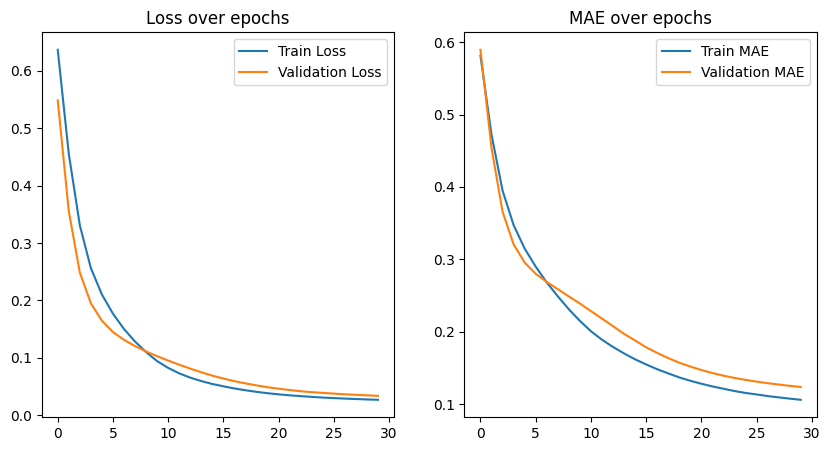

In [ ]:
plot_history(history_baseline)

Sedikit overfitting, namun selisih antara training loss dan validation loss masih tergolong kecil.

In [ ]:
def evaluate_lstm_model(test_ds, model, scaler=None):
  y_true, y_pred = [], []

  for X_batch, y_batch in test_ds:
    preds = model.predict(X_batch, verbose=0)

    if scaler:
      y_batch = scaler.inverse_transform(y_batch.numpy().reshape(-1, 1))
      preds = scaler.inverse_transform(preds)

    y_true.extend(y_batch)
    y_pred.extend(preds)

  y_true = np.squeeze(y_true)
  y_pred = np.squeeze(y_pred)

  return {
      'mae': mean_absolute_error(y_true, y_pred),
      'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
      'r2': r2_score(y_true, y_pred),
      'mape': mean_absolute_percentage_error(y_true, y_pred)
  }


In [ ]:
def prediction_vs_actual(test_ds, model, scaler=None):
    test_predictions = model.predict(test_ds).flatten()
    test_actuals = np.concatenate([y for x, y in test_ds], axis=0).flatten()

    if scaler:
        test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
        test_actuals = scaler.inverse_transform(test_actuals.reshape(-1, 1)).flatten()

    plt.figure(figsize=(15, 6))
    plt.plot(test_predictions, label='Predicted', color='teal')
    plt.plot(test_actuals, label='Actual', color='orange', alpha=0.7)
    plt.title('Predicted vs Actual with Residual Scatter')
    plt.legend()
    plt.grid(True)
    plt.show()


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


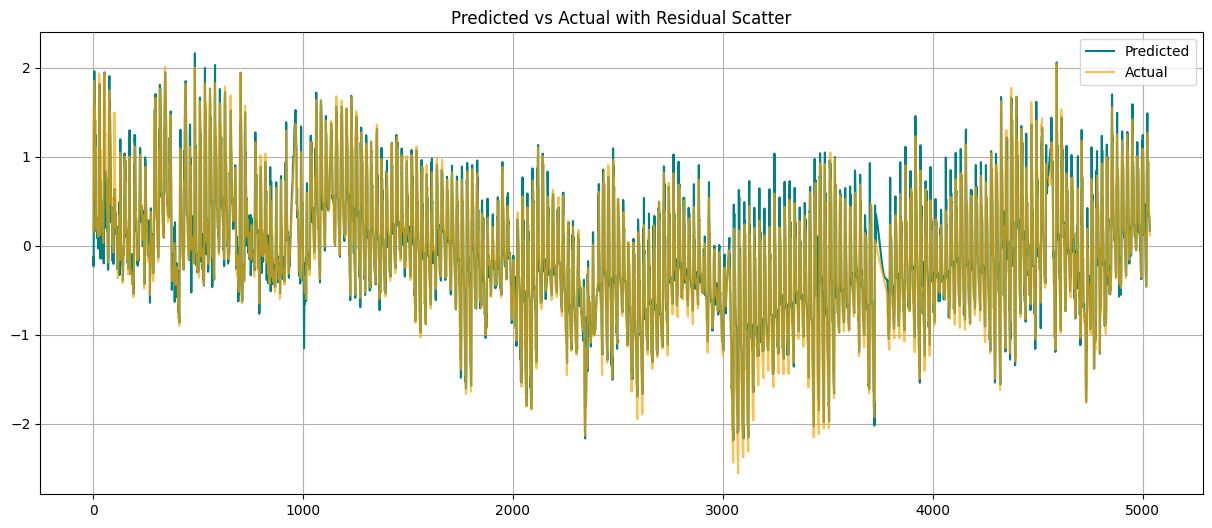

In [ ]:
prediction_vs_actual(test_ds, model_lstm_baseline)

## Model LSTM 2

In [ ]:
model_lstm = load_model('model-lstm2.keras')

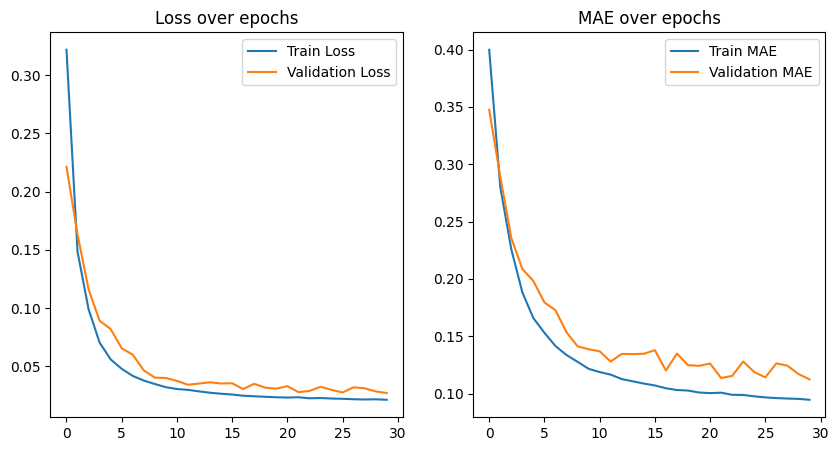

In [ ]:
plot_history(history_lstm2)

Gap antara train dan validation lebih besar dibanding plot baseline. Oleh karena itu, plot ini juga dianggap overfitting walau tidak parah.

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


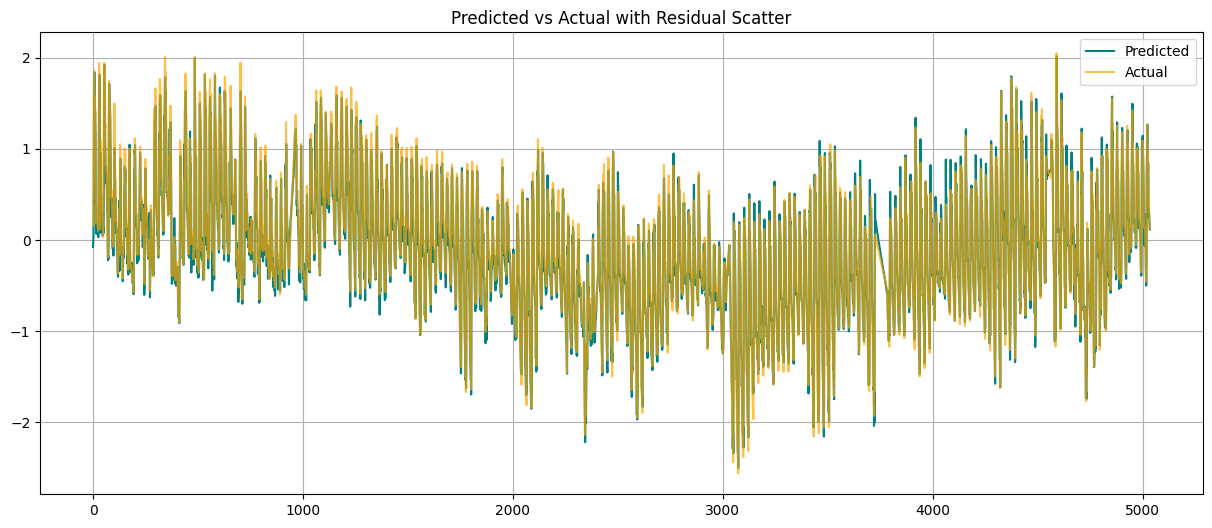

In [ ]:
prediction_vs_actual(test_ds, lstm2)

In [ ]:
# PERBANDINGAN 2 MODEL

model_baseline_metrics = evaluate_lstm_model(test_ds, model_lstm_baseline, scaler_y)
model_lstm2_metrics = evaluate_lstm_model(test_ds, lstm2, scaler_y)

comparison_df = pd.DataFrame({
    'Baseline Model': model_baseline_metrics,
    'Tuned Model': model_lstm2_metrics
})

# Transpose supaya jadi baris
comparison_df = comparison_df.T

comparison_df

mae      rmse        r2      mape
Baseline Model  0.729596  1.077020  0.929331  0.027431
Tuned Model     0.594685  0.859393  0.955005  0.022020

Perbandingan Model Baseline dengan Model Modifikasi:

| Metrik                                    | Perbandingan                                     |
| ----------------------------------------- | ------------------------------------------------
| **MAE** (Mean Absolute Error)                 | Turun → Prediksi lebih mendekati nilai aktual    |
| **RMSE** (Root Mean Squared Error)          | Turun → Kesalahan besar makin jarang terjadi     |
| **R²** (Koefisien Determinasi)             | Naik → Model menjelaskan variasi data lebih baik |
| **MAPE** (Mean Absolute Percentage Error)    | Turun → Persentase kesalahan rata-rata membaik   |

Oleh karena itu, **Model Modifikasi dipilih sebagai BEST MODEL** karena lebih akurat, presisi, dan lebih mampu menjelaskan variabilitas data.


# F. Pertanyaan Bonus
Apakah problem ini mungkin menggunakan time series
multivariate, bagaimana mengetahui apakah problem tersebut dapat menjadi multivariate, jelaskan jawaban
anda untuk problem ini
- **Time Series Multivariate** adalah memprediksi target atau output (di kasus ini AT) menggunakan *banyak variable lainnya*. Pendekatan yang lebih kaya informasi dan seringkali lebih akurat untuk model dibanding univariate.
- Univariate hanya membandingkan dengan data histori (dengan AT di masa lalu).

*Kapan Multivariate tidak disarankan:*
- Pendekatan multivariate hanya efektif jika fitur-fitur tersebut memiliki korelasi atau pengaruh yang cukup kuat terhadap target.
- Jika korelasi fitur terhadap target rendah, maka menambahkan fitur-fitur tersebut justru bisa menambah noise dan menyebabkan model lebih kompleks atau overfitting, sehingga hasilnya bisa jadi tidak lebih baik dibanding model univariate.
